# Analysis of Sensor and Lab samples

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import scipy.stats as stats

from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance

In [2]:
local_folder = "/Users/massimilianoarca/Documents/PoliMi/Research Grant/SafeCREW/Data/Tarragona"

clean_data_folder = os.path.join(local_folder, "Clean Data")

# Utils

In [3]:
# keys are for the lab, values are for the sensors
eb0_features_mapping = {
    # 'Alarma Espectral', # ALARMA ESPECTRAL
    "Color": "COLOR",  # COLOR
    "Conductivitat a 20oC": "COND",  # COND
    # 'Ox', # OX
    "Sòlids en suspensió": "PARTICULES",  # PARTICULES
    "pH": "PH",  # PH
    "Mercuri": "RATIO_HG",  # RATIO_HG
    # 'Ratio Terb Sig', # RATIO_TERB_SIG
    # 'Ratio Tlf Uv', # RATIO_TLF_UV
    "Sulfats": "SULFAT",  # SULFAT
    "Temperatura": "TEMP",  # TEMP
    # 'Temperatura Aigua', # TEMP_AIGUA
    "Terbolesa": "TERBOLESA",  # TERBOLESA
    # 'Tlf', # TLF
    "Índex UV": "UV254",  # UV254
    # 'Vis436', # VIS436
    # 'Vis525', # VIS525
    # 'Vis620', # VIS620
}

In [4]:
# keys are for the lab, values are for the sensors
eb1_features_mapping = {
    # 'Alarma Spectral', # ALARMA SPECTRAL
    "Clor lliure residual": "CLOR LLIURE",  # CLOR LLIURE
    "Color": "COLOR",  # COLOR
    "Conductivitat a 20oC": "CONDUCTIVITAT",  # CONDUCTIVITAT
    # 'DOC', # DOC
    # 'ORP', # ORP
    "Sòlids en suspensió": "PARTICULES",  # PARTICULES
    "pH": "PH",  # PH
    "Temperatura": "TEMPERATURA",  # TEMPERATURA
    "Terbolesa": "TERBOLESA",  # TERBOLESA SCAN
    # 'Tlf', # TLF
    "Carboni Orgànic Total Tractament": "TOC",  # TOC
    "Índex UV": "UVA",  # UVA
    # 'Vis436', # VIS436
    # 'Vis525', # VIS525
    # 'Vis620', # VIS620
}

In [5]:
import unicodedata


def normalize_string(s):
    return unicodedata.normalize("NFKD", s)

# Load Data

In [6]:
eb0_features_lab_df = pd.read_excel(
    os.path.join(clean_data_folder, "EB0_Features_Lab.xlsx")
)

eb0_targets_lab_df = pd.read_excel(
    os.path.join(clean_data_folder, "EB0_Targets_Lab.xlsx")
)

In [7]:
eb1_features_lab_df = pd.read_excel(
    os.path.join(clean_data_folder, "EB1_Features_Lab.xlsx")
)

eb1_targets_lab_df = pd.read_excel(
    os.path.join(clean_data_folder, "EB1_Targets_Lab.xlsx")
)

In [8]:
eb0_sensor_df = pd.read_excel(
    os.path.join(clean_data_folder, "EB0_Sensor.xlsx")
)

In [9]:
eb1_sensor_df = pd.read_excel(
    os.path.join(clean_data_folder, "EB1_Sensor.xlsx")
)

In [10]:
thms_df = pd.read_excel(
    os.path.join(clean_data_folder, "THMs.xlsx")
)

In [11]:
# eb0_sensor_df = eb0_sensor_df[eb0_sensor_df['ALARMA ESPECTRAL'] < 3]
# eb1_sensor_df = eb1_sensor_df[eb1_sensor_df['ALARMA SPECTRAL'] < 3]

# Lab vs Sensor Data

## EB0

In [12]:
eb0_features_lab_df.columns = [normalize_string(c) for c in eb0_features_lab_df.columns]

eb0_features_mapping = {
    normalize_string(k): v for k, v in eb0_features_mapping.items()
}

### Histograms

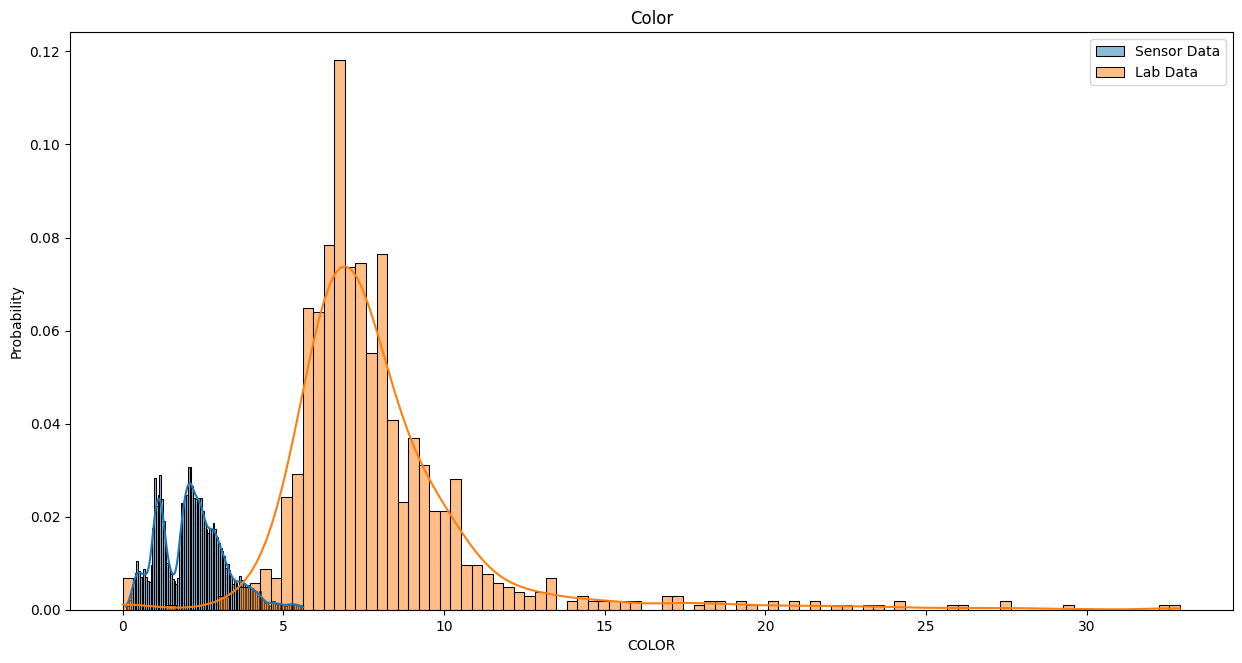

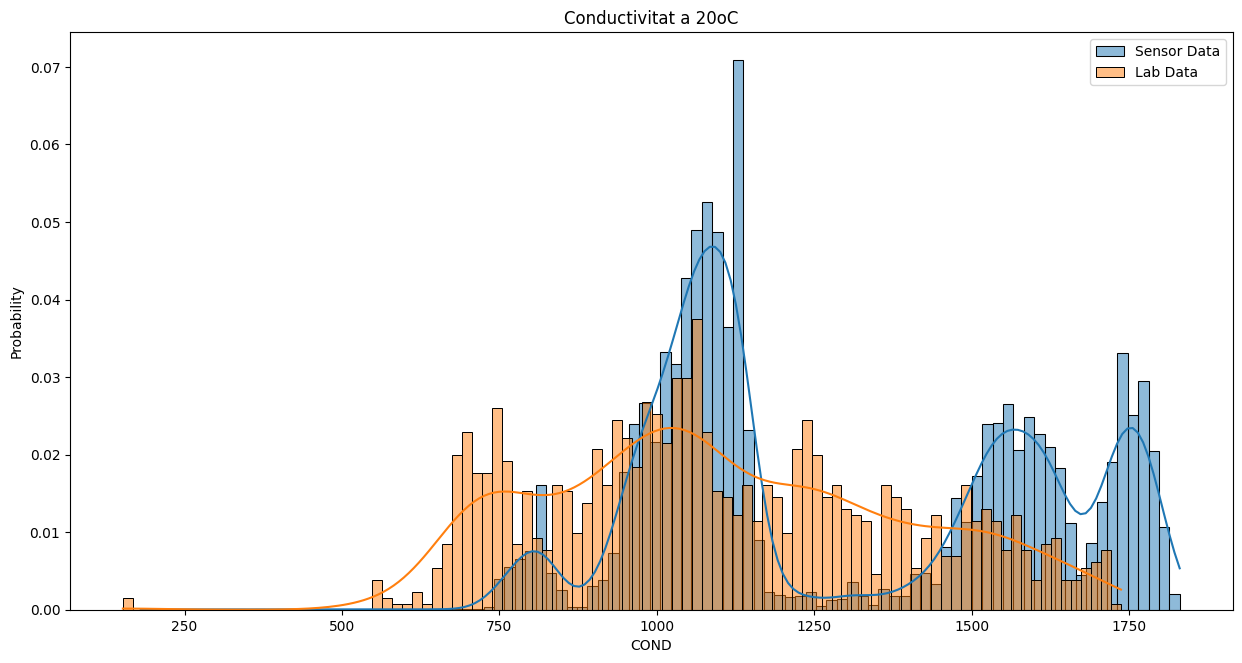

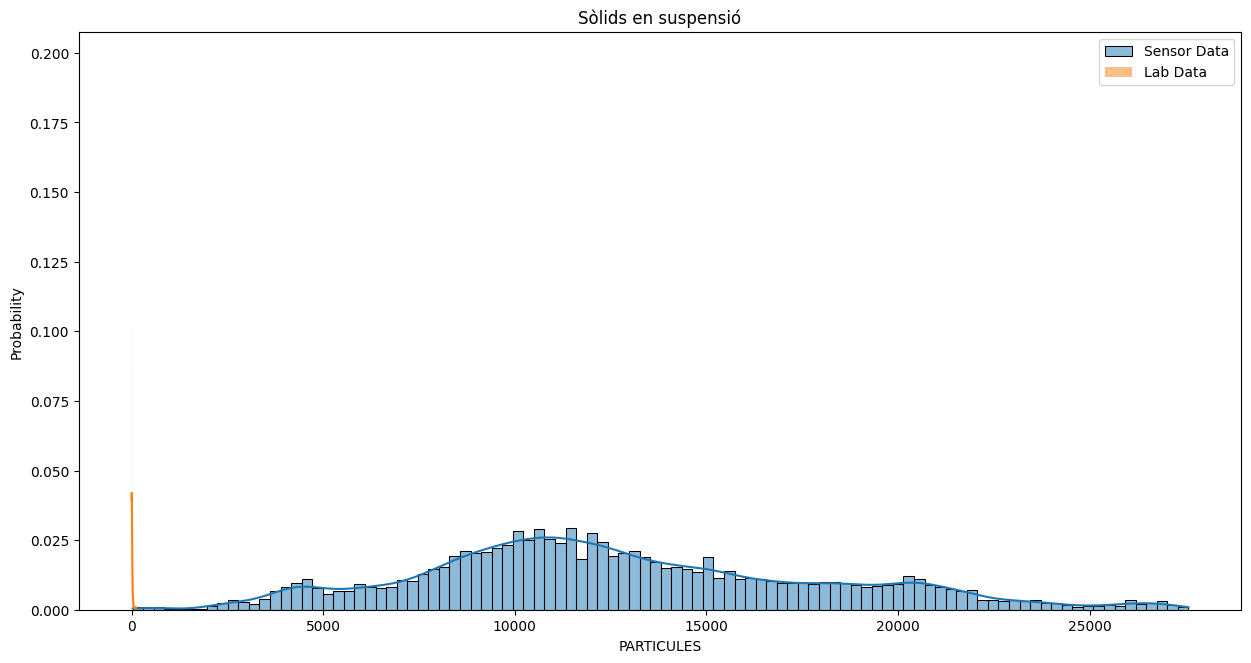

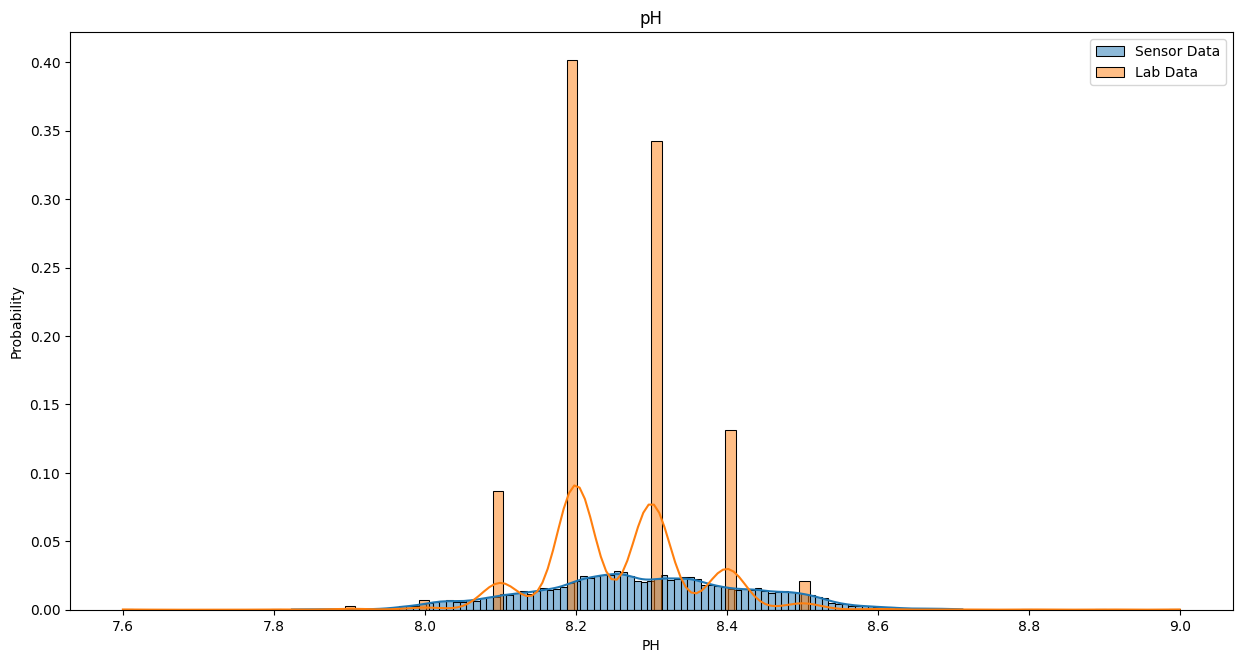

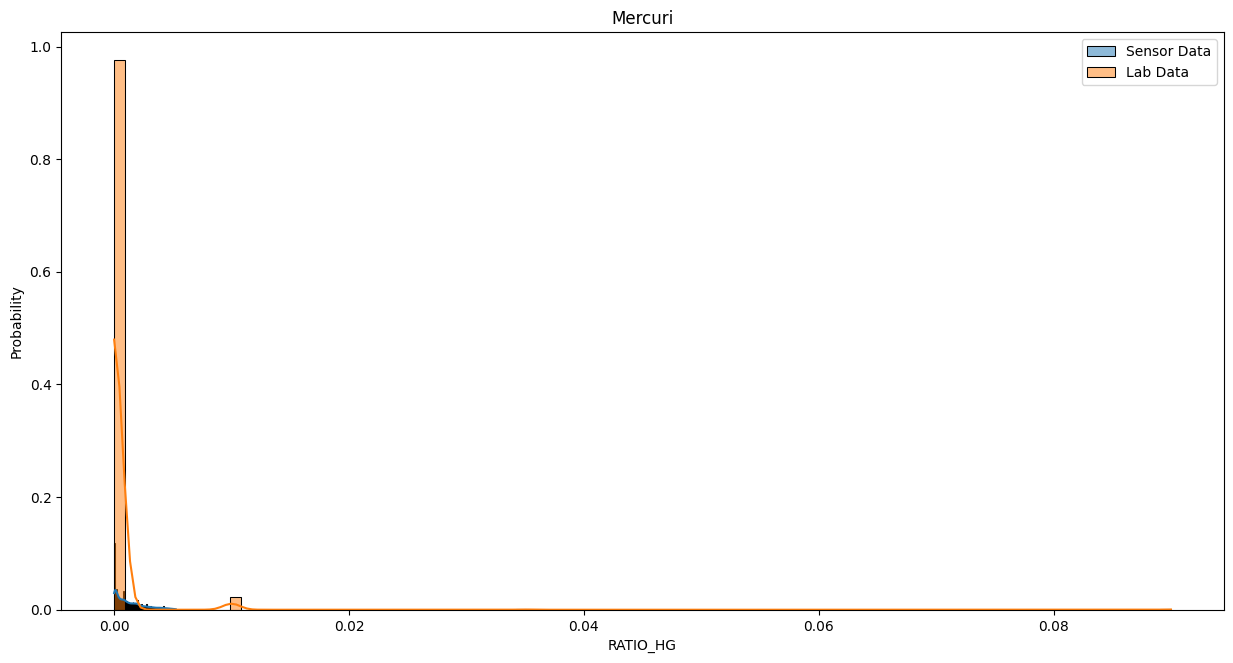

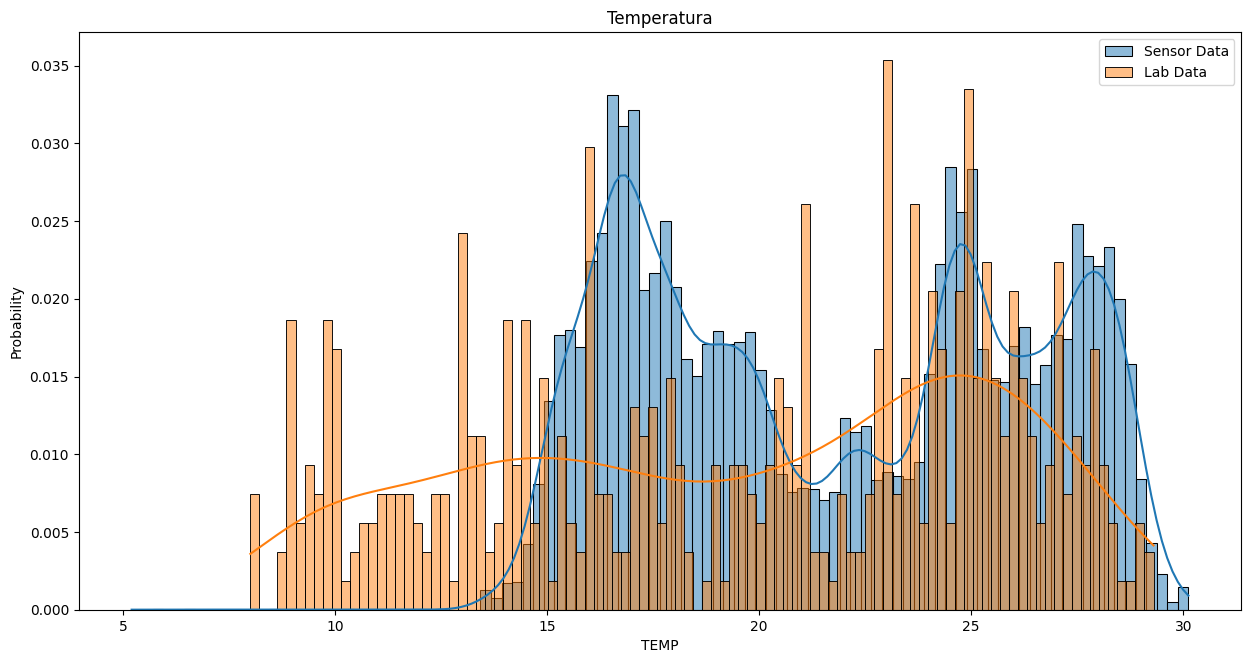

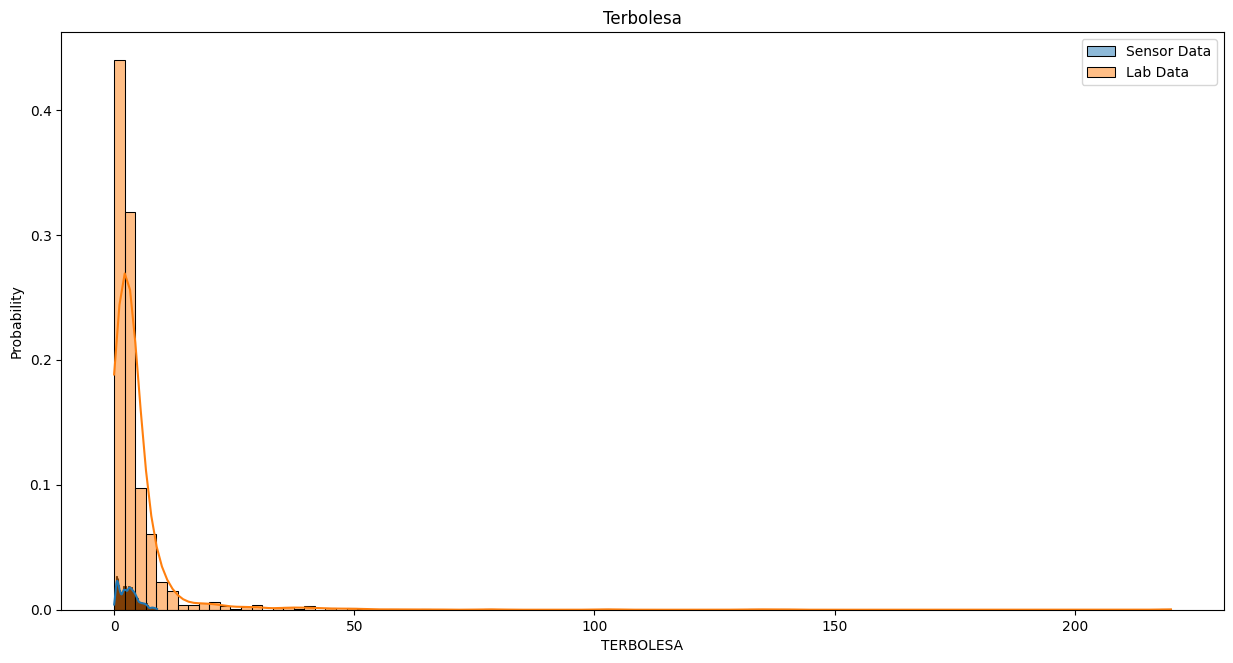

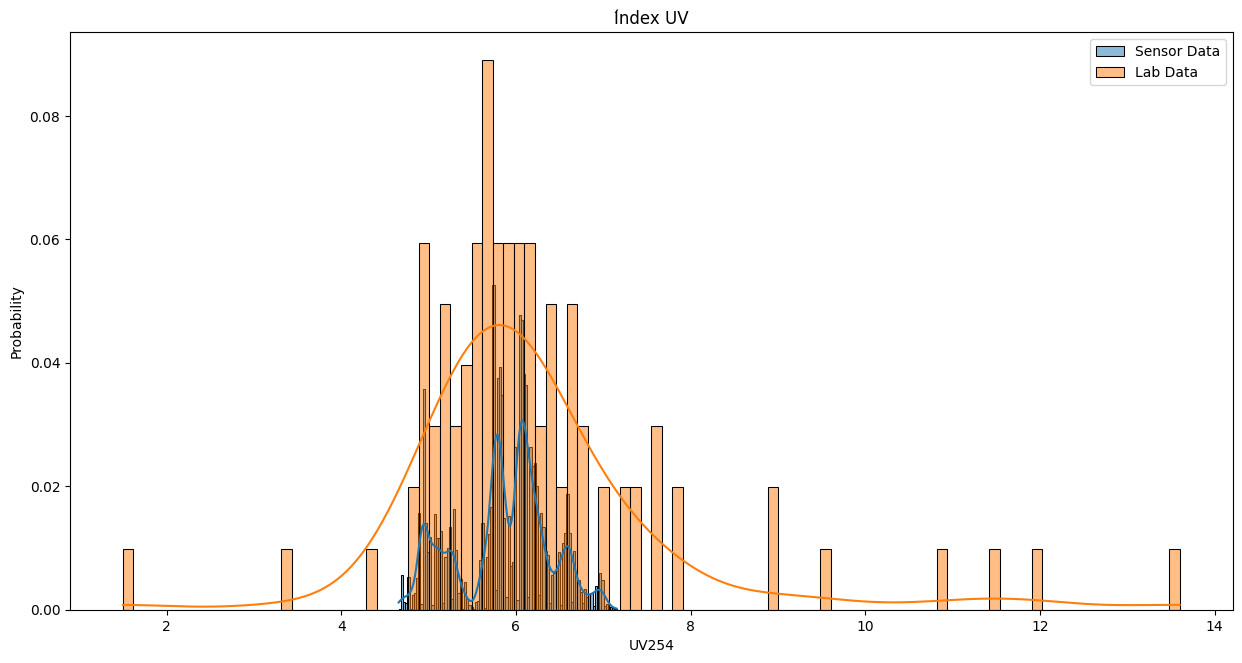

In [13]:
for lab_key, sensor_key in eb0_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb0_features_lab_df[lab_key]
    sensor_df = eb0_sensor_df[sensor_key]
    
    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:

        plt.figure(figsize=(15, 7.5))

        # counts, bins, patches = plt.hist(
        #     lab_df,
        #     bins=100,
        #     color="blue",
        #     alpha=0.5,
        #     label="Lab",
        #     density=True,
        # )
        # # # Add counts as annotations
        # # for count, bin in zip(counts, bins):
        # #     plt.text(bin, count, str(int(count)))

        # plt.hist(
        #     sensor_df,
        #     bins=100,
        #     color="red",
        #     alpha=0.5,
        #     label="Sensor",
        #     density=True,
        # )
        
        sns.histplot(
            data=sensor_df,
            kde=True,
            bins=100,
            alpha=0.5,
            stat='probability',
            label='Sensor Data'
        )
        
        sns.histplot(
            data=lab_df,
            kde=True,
            bins=100,
            stat='probability',
            label='Lab Data'
        )
        
        plt.title(lab_key)
        plt.legend()
        plt.show()
        
        # The y-axis of a histplot with stat="probability" corresponds
        # to the probability that a value belongs to a certain bar.
        # The sum of the bar heights must be 1.

### Boxplots

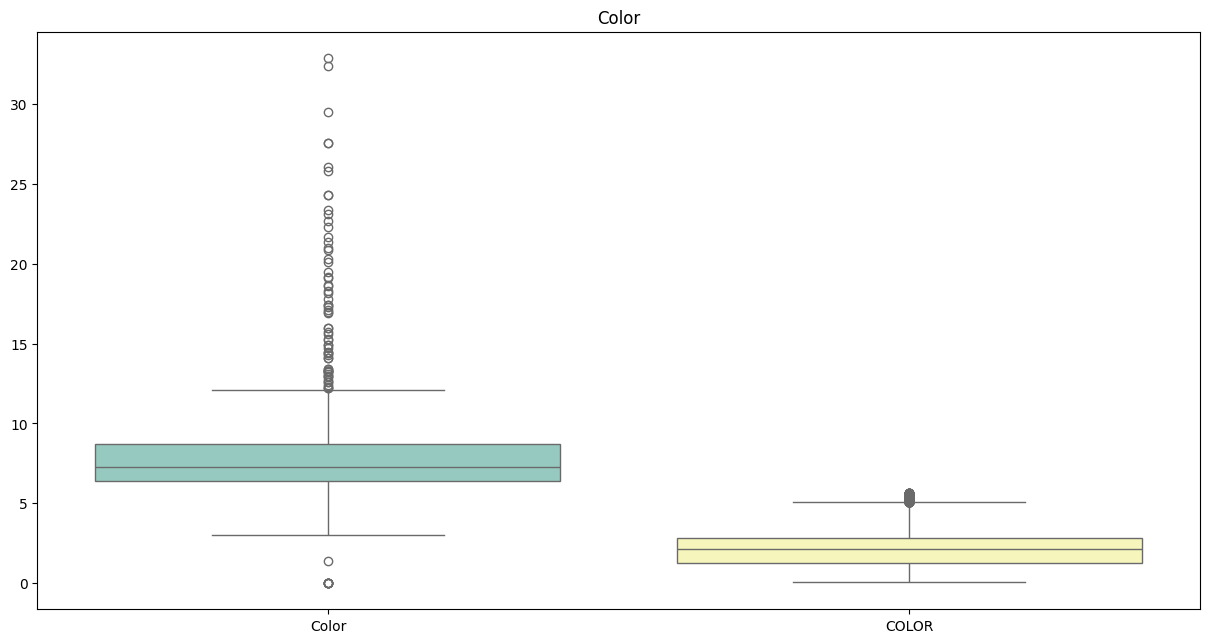

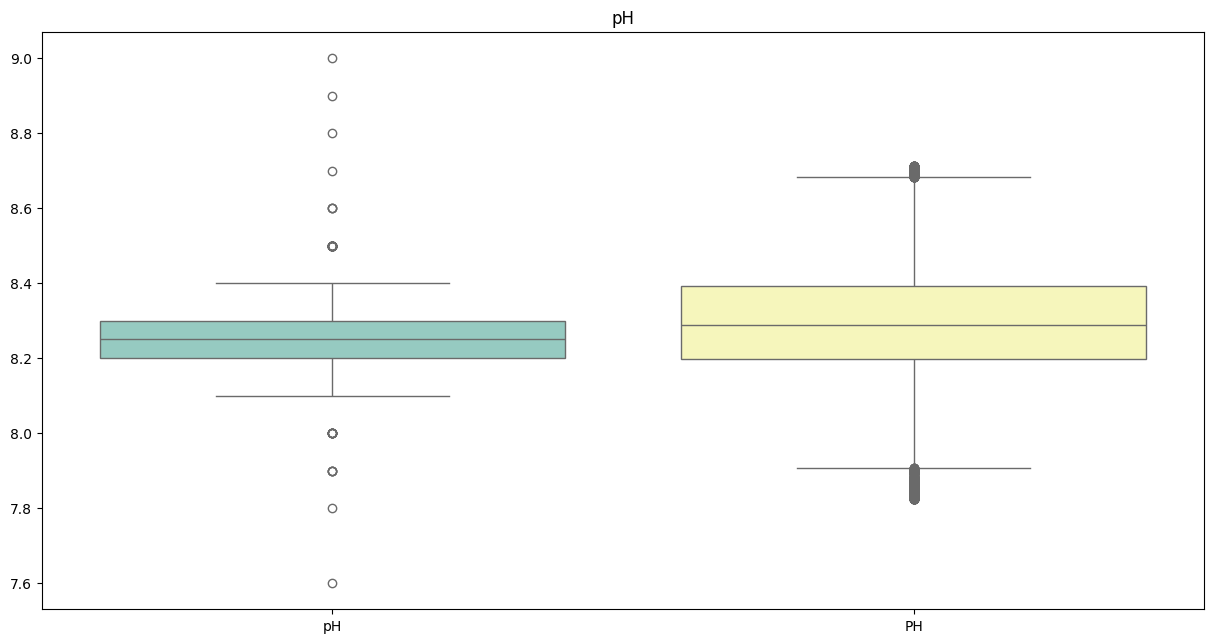

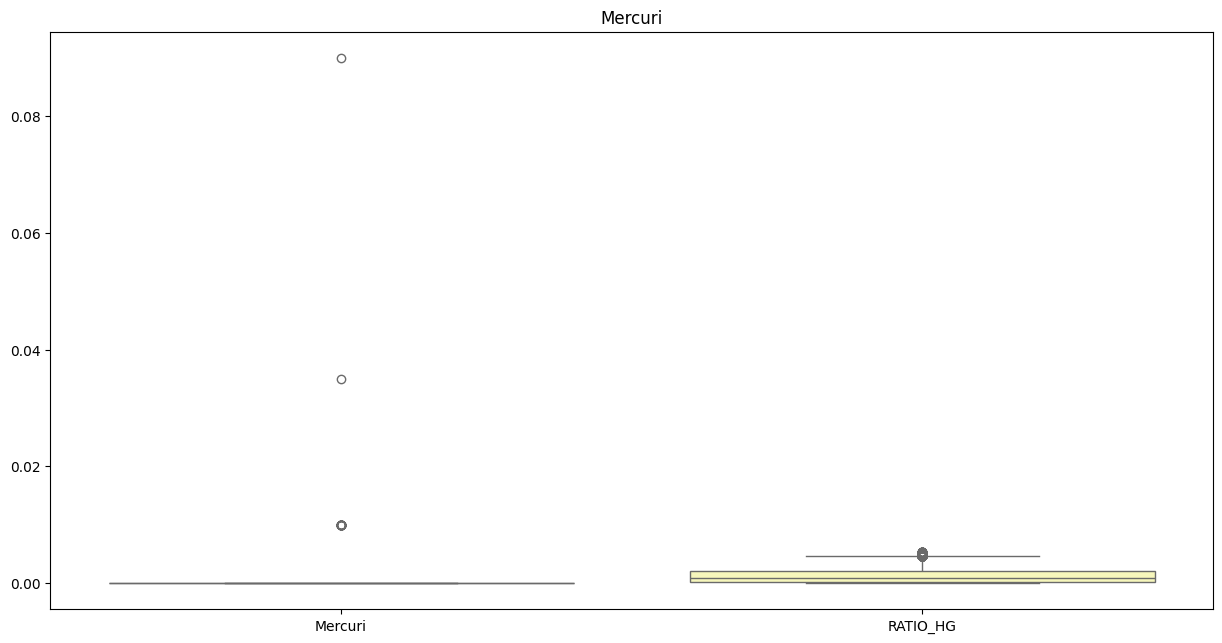

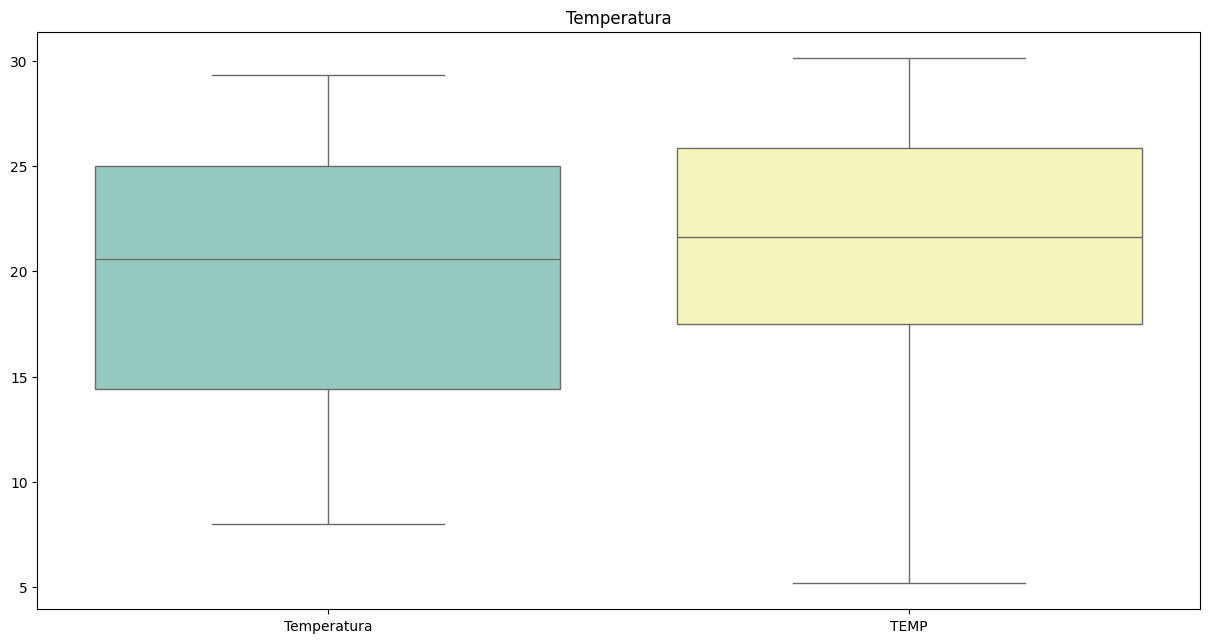

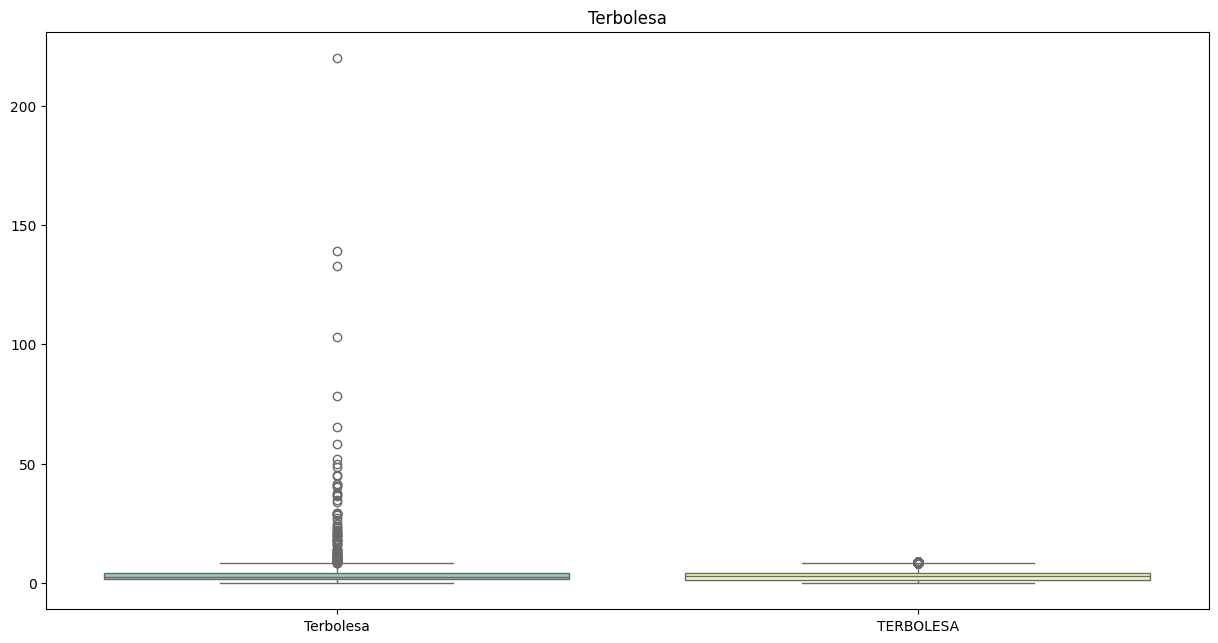

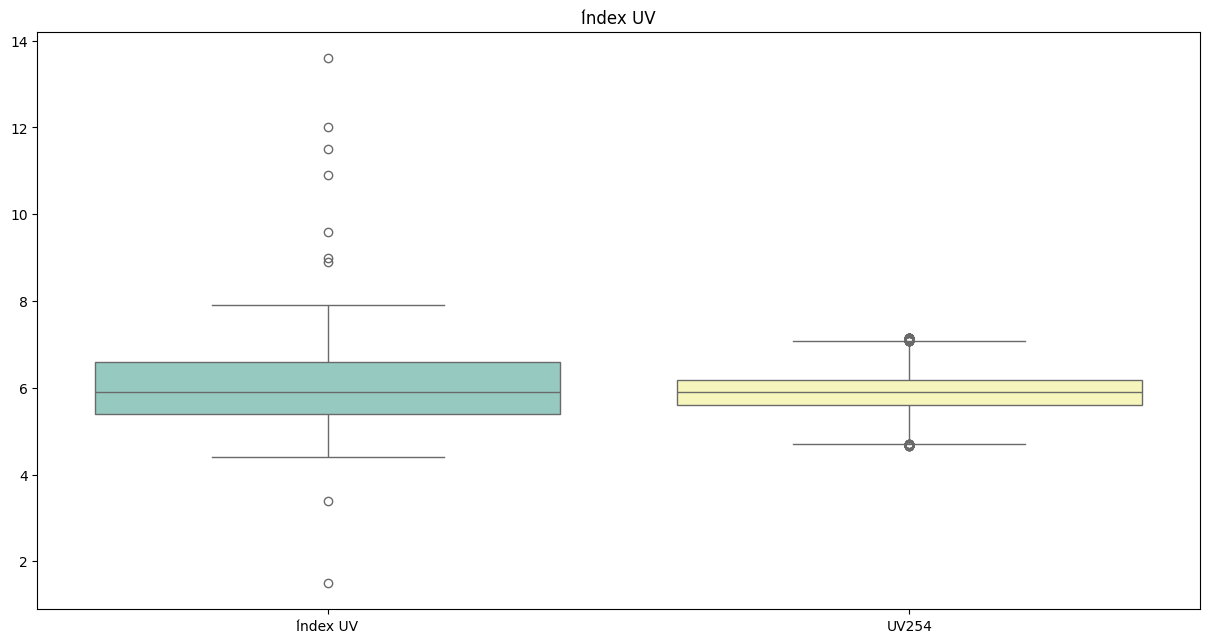

In [14]:
for lab_key, sensor_key in eb0_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb0_features_lab_df[lab_key]
    sensor_df = eb0_sensor_df[sensor_key]
    
    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:

        plt.figure(figsize=(15, 7.5))
        
        sns.boxplot(
            data=[lab_df, sensor_df],
            palette="Set3"
        )
        
        plt.title(lab_key)
        plt.show()

### Time series

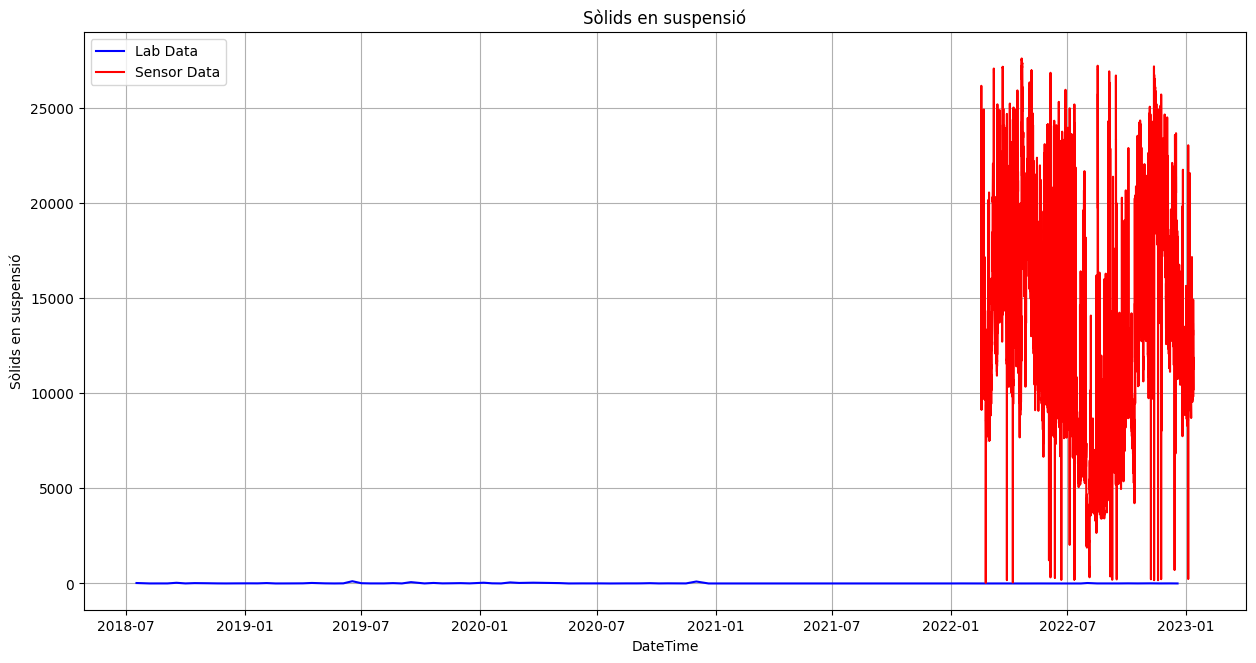

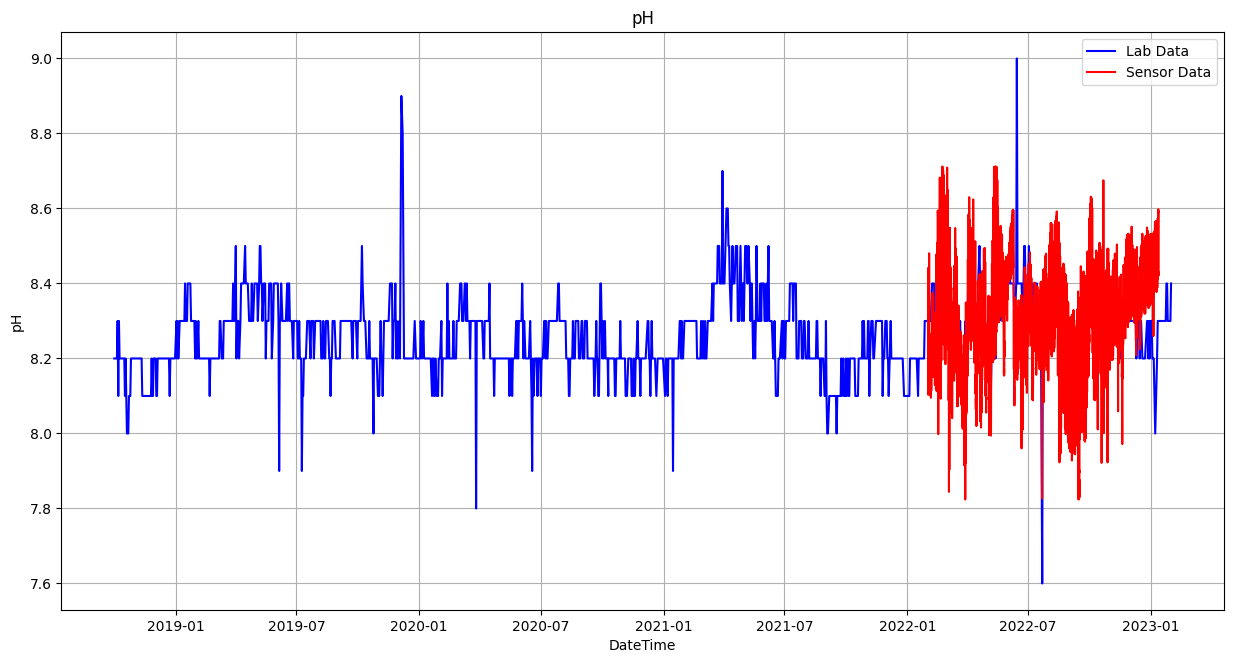

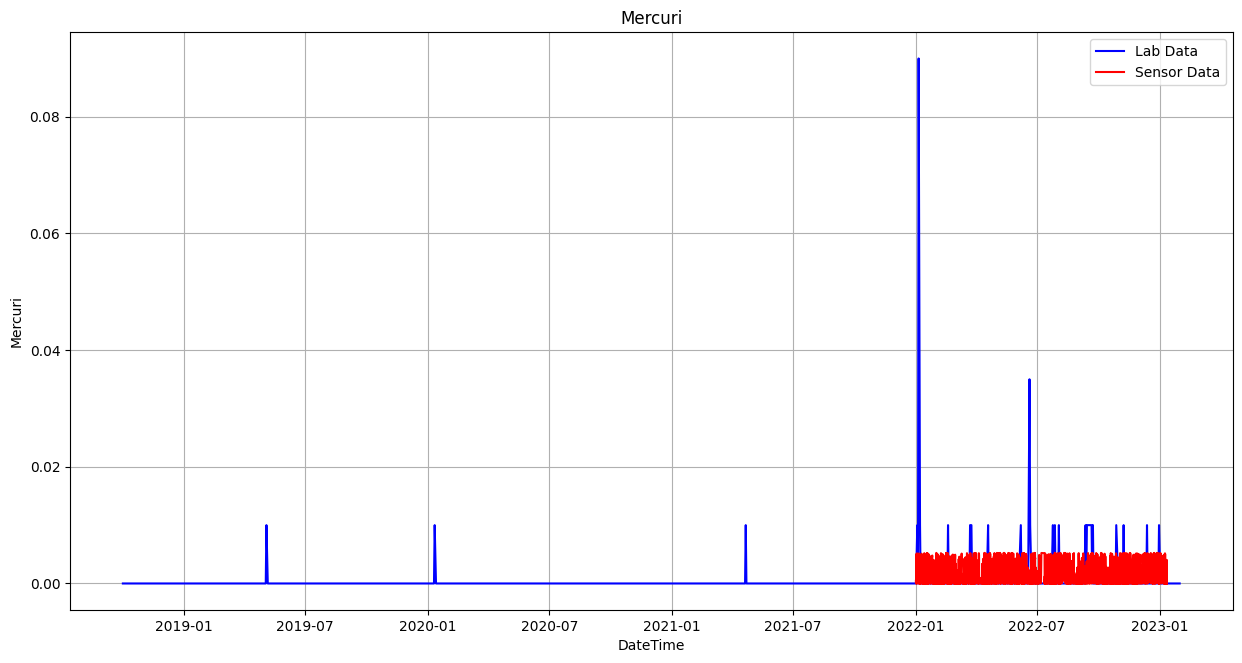

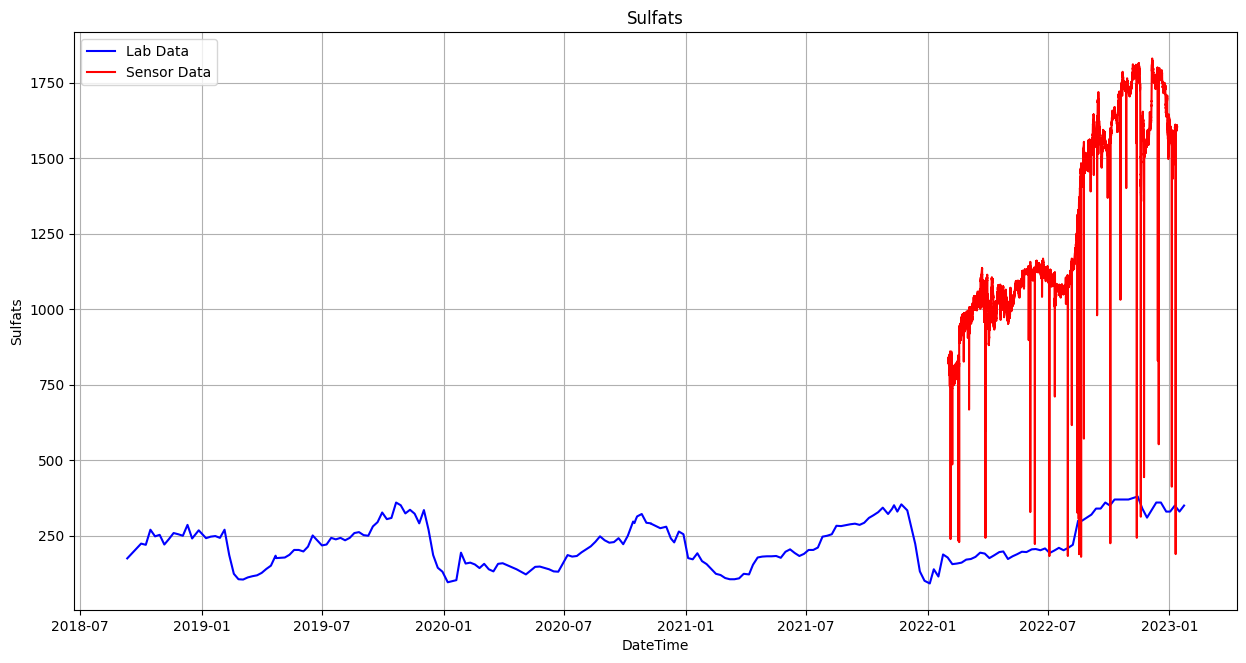

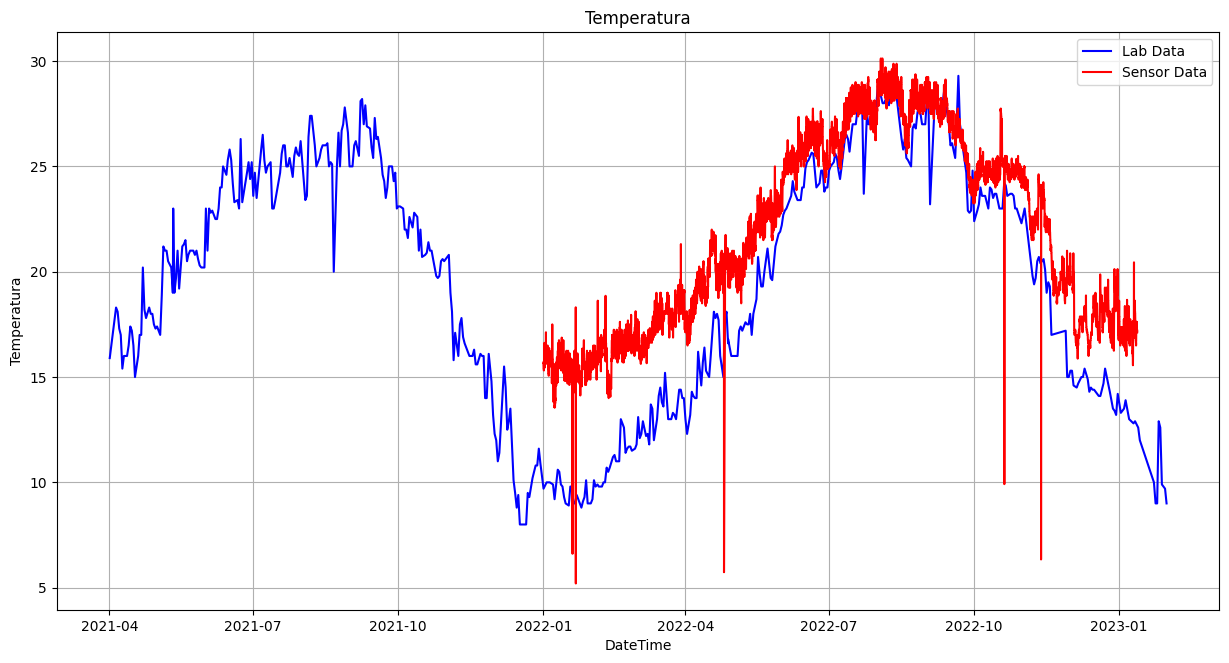

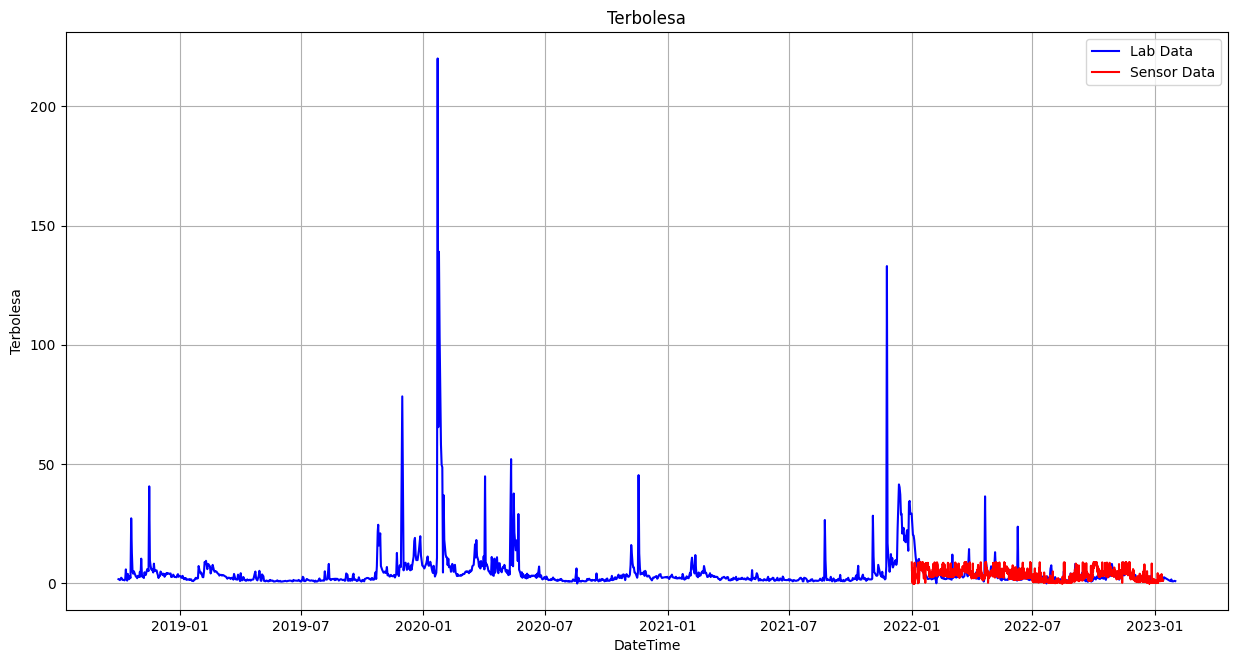

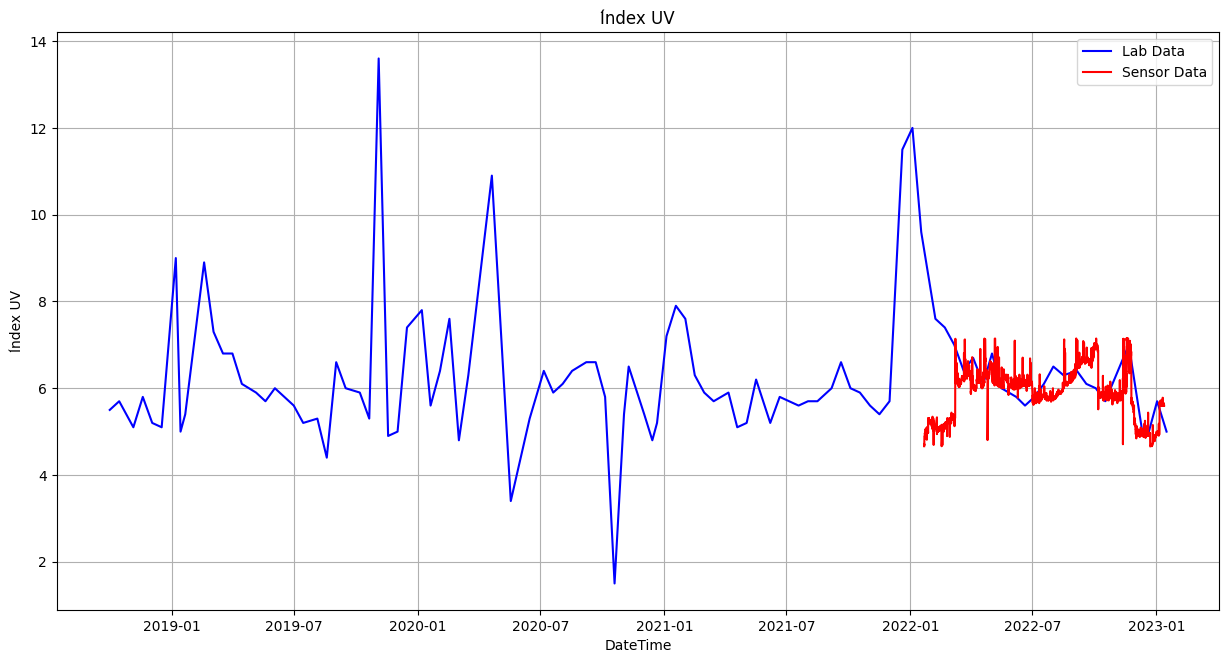

In [15]:
for lab_key, sensor_key in eb0_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb0_features_lab_df[['DateTime', lab_key]]
    sensor_df = eb0_sensor_df[['DateTime', sensor_key]]
    
    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:

        plt.figure(figsize=(15, 7.5))
        
        sns.lineplot(
            x='DateTime',
            y=lab_key,
            data=lab_df,
            color='blue',
            label='Lab Data',
        )
        
        sns.lineplot(
            x='DateTime',
            y=sensor_key,
            data=sensor_df,
            color='red',
            label='Sensor Data'
        )
        
        plt.title(lab_key)
        plt.legend()
        plt.grid(True)
        plt.show()

### Retrieve Common Time Range data + Hypothesis Tests

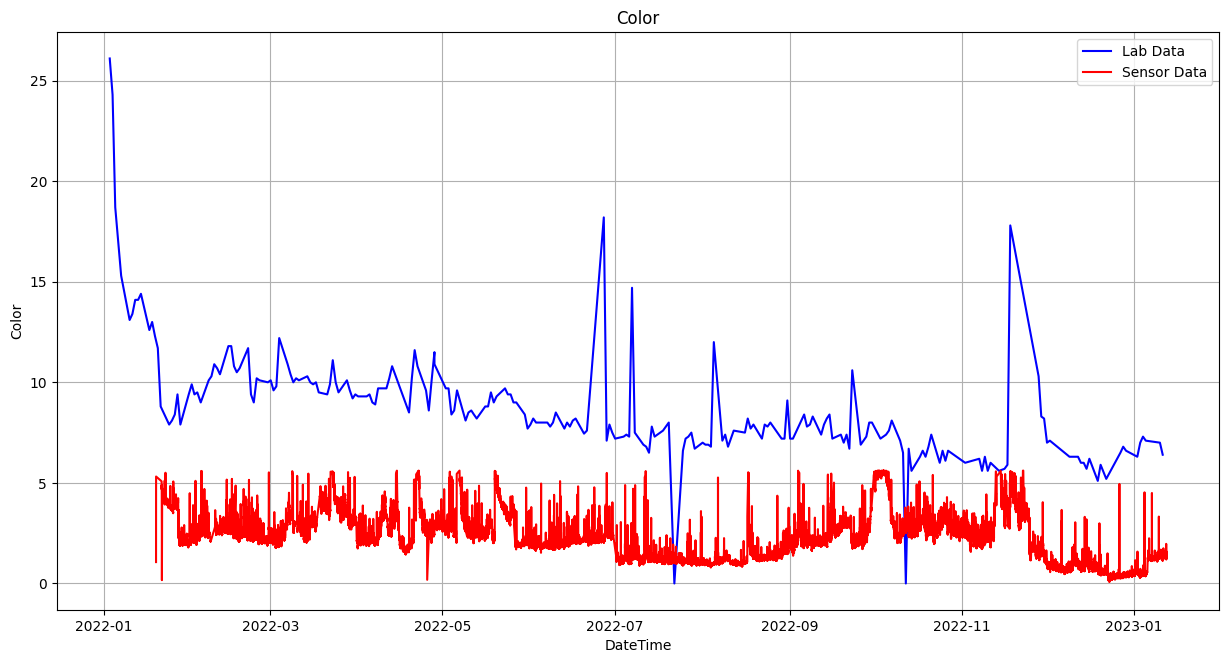

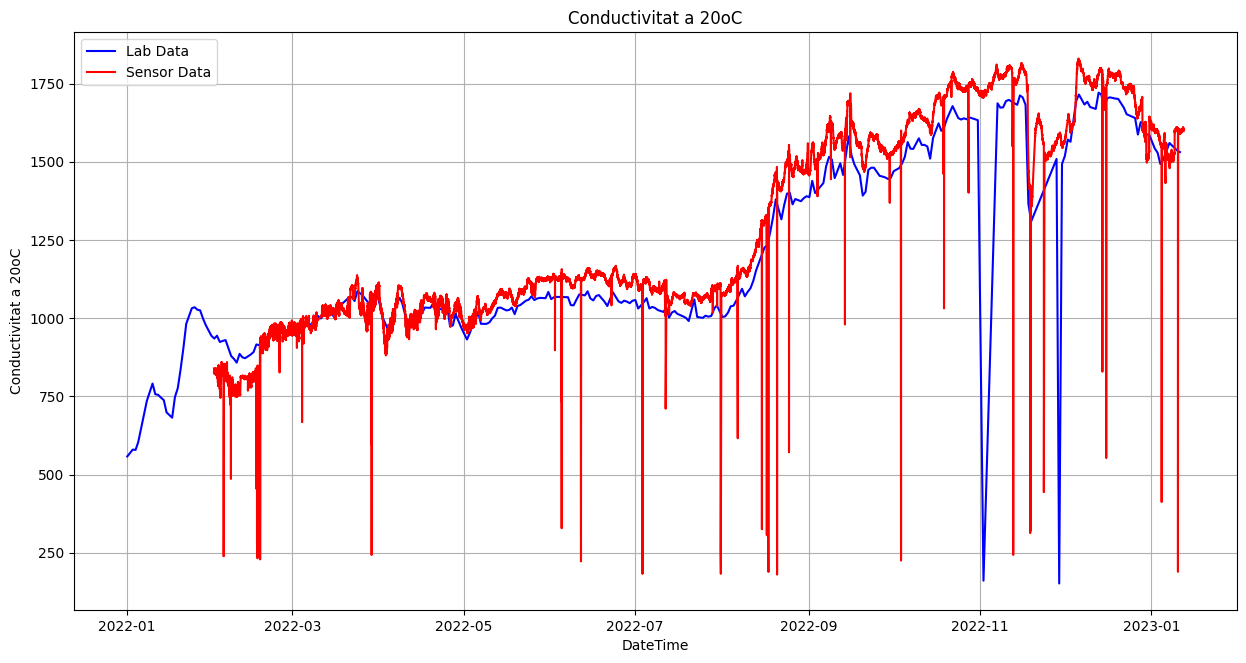

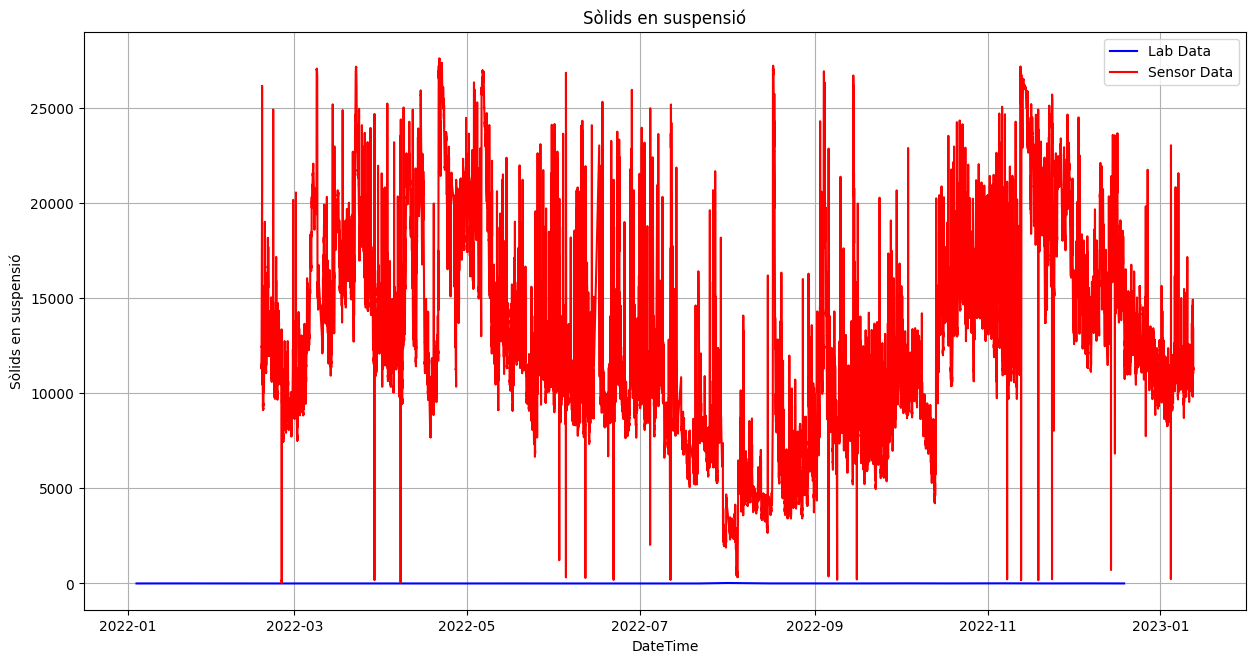

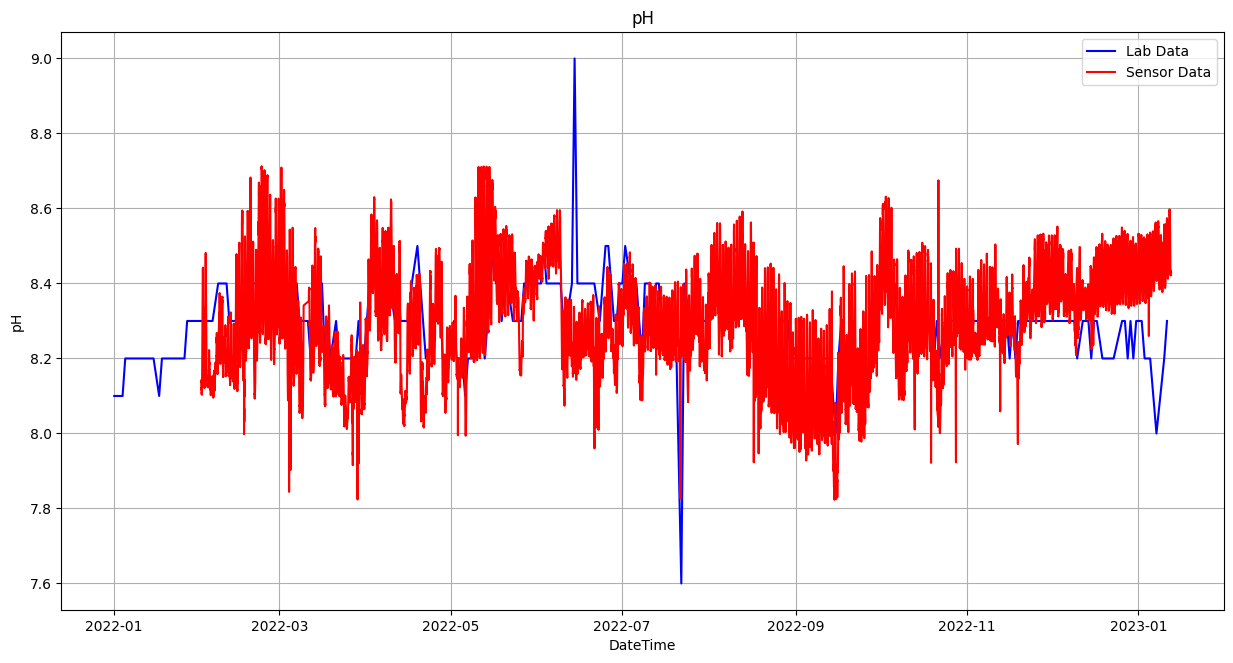

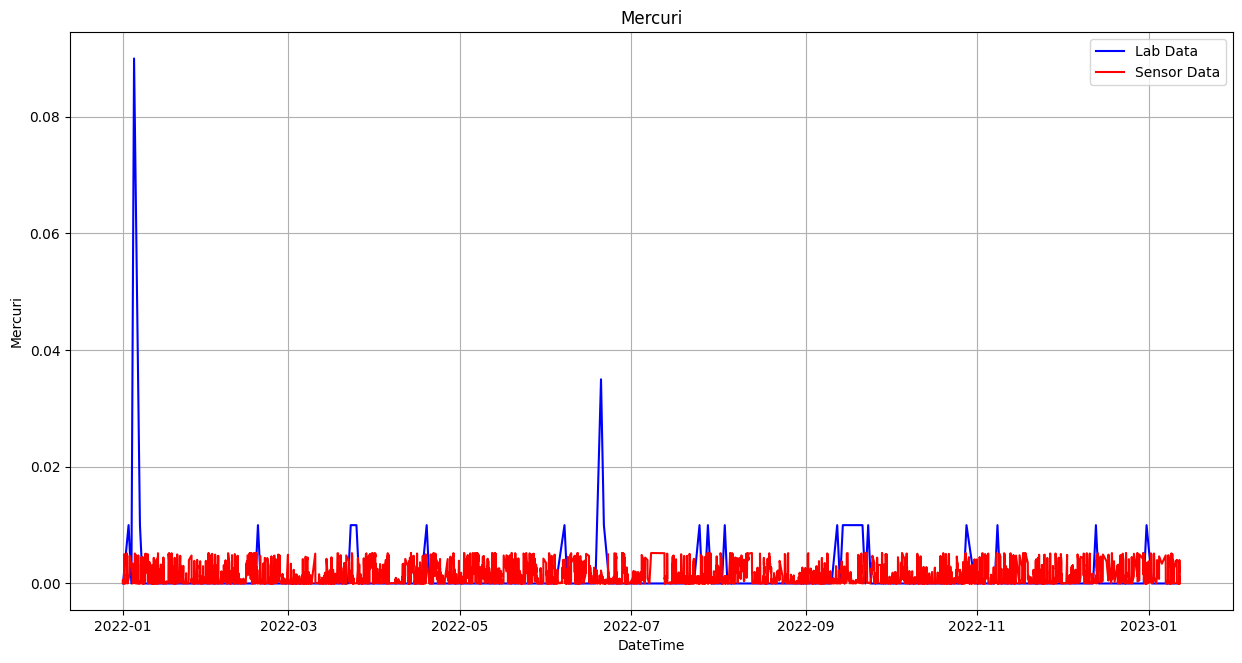

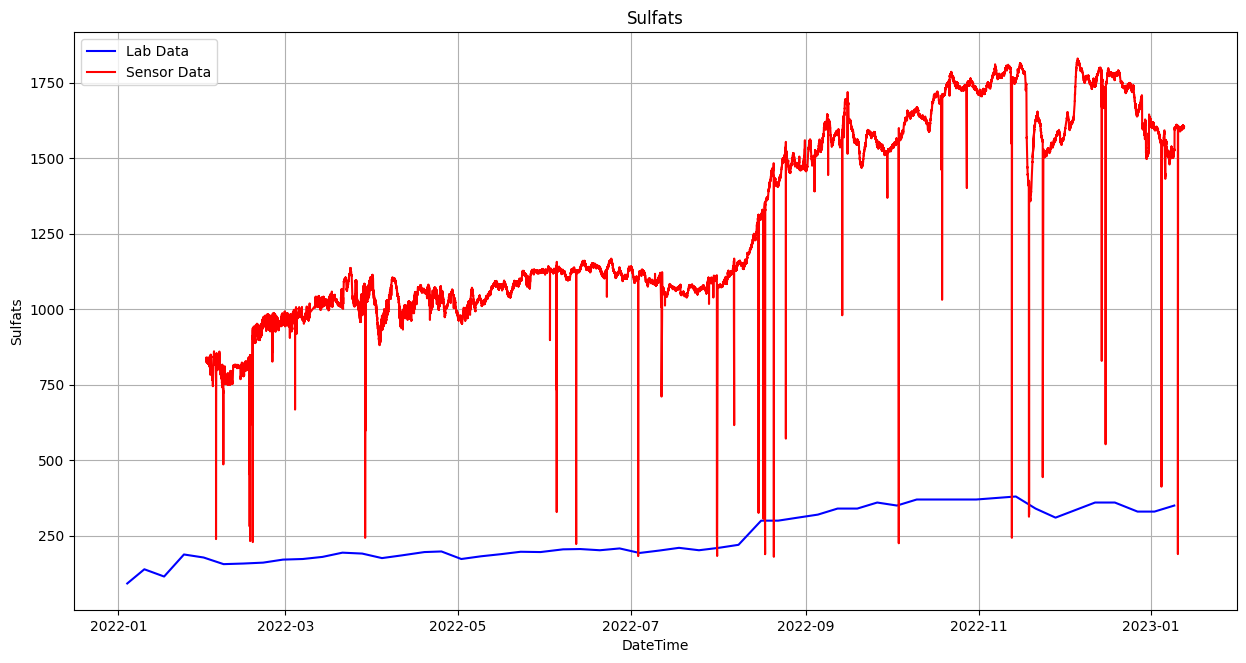

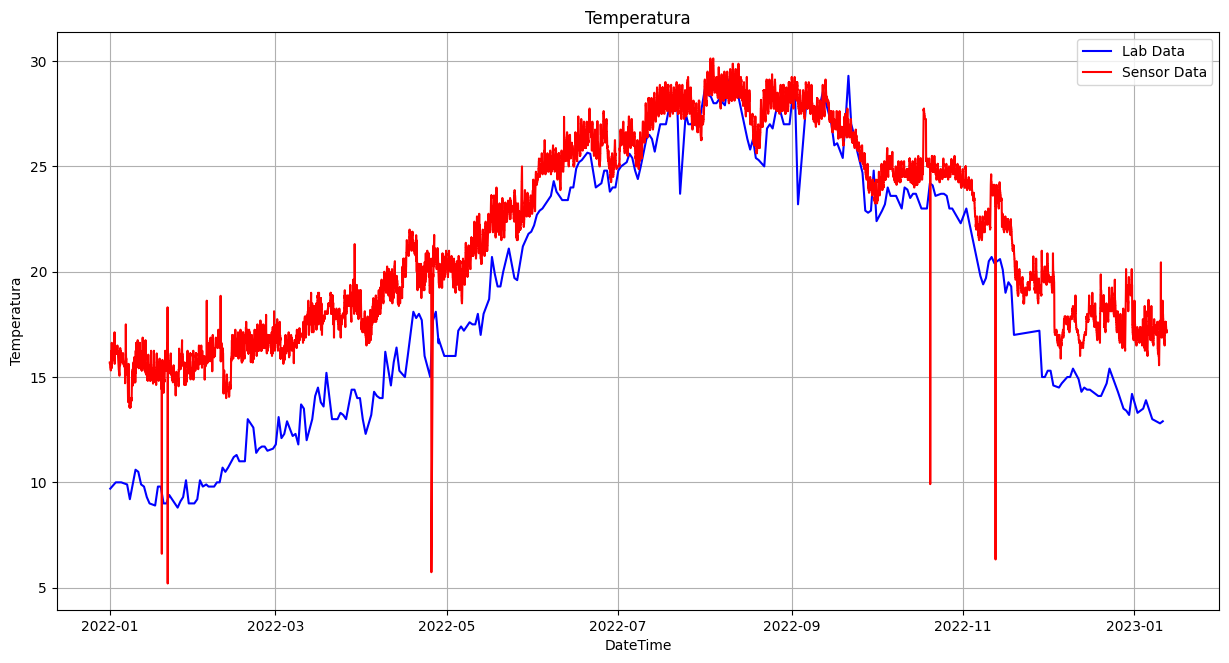

In [16]:
ks_hypothesis_tests = {}
t_hypothesis_tests = {}
u_hypothesis_tests = {}

# get common time range samples for lab and sensor data
for lab_key, sensor_key in eb0_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb0_features_lab_df[['DateTime', lab_key]]
    sensor_df = eb0_sensor_df[['DateTime', sensor_key]]
    
    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:
        
        lab_time_range_df = lab_df[
            (
                lab_df["DateTime"]
                >= sensor_df["DateTime"].min()
            )
            & (
                lab_df["DateTime"]
                <= sensor_df["DateTime"].max()
            )
        ]
        
        sensor_time_range_df = sensor_df[
            (
                sensor_df["DateTime"]
                >= lab_df["DateTime"].min()
            )
            & (
                sensor_df["DateTime"]
                <= lab_df["DateTime"].max()
            )
        ]
        
        plt.figure(figsize=(15, 7.5))
        
        sns.lineplot(
            x='DateTime',
            y=lab_key,
            data=lab_time_range_df,
            color='blue',
            label='Lab Data',
        )
        
        sns.lineplot(
            x='DateTime',
            y=sensor_key,
            data=sensor_time_range_df,
            color='red',
            label='Sensor Data'
        )
        
        # two sample KS test
        ks_result, ks_p_value = stats.ks_2samp(lab_df[lab_key], sensor_df[sensor_key])
        t_result, t_p_value = stats.ttest_ind(lab_df[lab_key].dropna(), sensor_df[sensor_key].dropna())
        u_result, u_p_value = stats.mannwhitneyu(lab_df[lab_key].dropna(), sensor_df[sensor_key].dropna())
        
        ks_hypothesis_tests[lab_key] = {
            'ks_test': ks_result,
            'p_value': ks_p_value
        }
        
        t_hypothesis_tests[lab_key] = {
            't_test': t_result,
            'p_value': t_p_value
        }
        
        u_hypothesis_tests[lab_key] = {
            'u_test': u_result,
            'p_value': u_p_value
        }
        
        plt.title(lab_key)
        plt.grid(True)
        plt.legend()
        plt.show()

In [17]:
pd.DataFrame(ks_hypothesis_tests).T

ks_test        p_value
Color                  0.859748   0.000000e+00
Conductivitat a 20oC   0.276419   6.868230e-93
Sòlids en suspensió  0.782226   0.000000e+00
pH                     0.314170  1.690863e-120
Mercuri                0.904693   0.000000e+00
Sulfats                0.750164   0.000000e+00
Temperatura            0.603940   0.000000e+00
Terbolesa              0.158684   1.477130e-30
Índex UV              0.855213   0.000000e+00

In [18]:
pd.DataFrame(t_hypothesis_tests).T

t_test        p_value
Color                  173.207085   0.000000e+00
Conductivitat a 20oC   -22.301345  6.664885e-110
Sòlids en suspensió  -22.016070  3.846793e-107
pH                      -8.330236   8.168820e-17
Mercuri                -25.954883  2.198023e-147
Sulfats                -51.077837   0.000000e+00
Temperatura            -11.118146   1.061171e-28
Terbolesa               27.258002  5.002820e-163
Índex UV                7.135088   9.738170e-13

In [19]:
pd.DataFrame(u_hypothesis_tests).T

u_test        p_value
Color                  99582457.5   0.000000e+00
Conductivitat a 20oC   42210265.0  1.895395e-101
Sòlids en suspensió        29.0   9.750628e-55
pH                     53777541.0   2.223721e-24
Mercuri                 1251480.0   0.000000e+00
Sulfats                    2820.0  1.658238e-144
Temperatura            22854059.5   6.513398e-17
Terbolesa              70031129.5   1.037683e-02
Índex UV               5374359.0   2.203106e-01

### Distributions Divergence

In [20]:
kl_divs = {}
js_divs = {}
tv_dists = {}
w_dists = {}

for lab_key, sensor_key in eb0_features_mapping.items():
    # Compute the probability distribution of the feature in each DataFrame
    lab_df = eb0_features_lab_df[lab_key]
    sensor_df = eb0_sensor_df[sensor_key]

    lab_pdist = np.histogram(
        lab_df.dropna(), bins=100, density=True
    )[0]
    sensor_pdist = np.histogram(
        sensor_df.dropna(), bins=100, density=True
    )[0]

    # Add a small constant to avoid division by zero
    lab_pdist = lab_pdist + np.finfo(np.float64).eps
    sensor_pdist = sensor_pdist + np.finfo(np.float64).eps

    # Compute divergence metrics
    kl_div = stats.entropy(lab_pdist, sensor_pdist)
    js_div = jensenshannon(lab_pdist, sensor_pdist)
    tv_dist = np.sum(np.abs(lab_pdist - sensor_pdist)) / 2
    w_dist = wasserstein_distance(lab_pdist, sensor_pdist)

    kl_divs[lab_key] = kl_div
    js_divs[lab_key] = js_div
    tv_dists[lab_key] = tv_dist
    w_dists[lab_key] = w_dist


kl_divs = pd.Series(kl_divs)
js_divs = pd.Series(js_divs)
tv_dists = pd.Series(tv_dists)
w_dists = pd.Series(w_dists)

In [21]:
kl_divs

Color                    0.945630
Conductivitat a 20oC     0.734894
Sòlids en suspensió    3.472778
pH                       2.491632
Mercuri                  0.504734
Sulfats                  2.399564
Temperatura              3.622236
Terbolesa                3.041117
Índex UV                2.674824
dtype: float64

In [22]:
js_divs

Color                    0.490284
Conductivitat a 20oC     0.357162
Sòlids en suspensió    0.670629
pH                       0.726762
Mercuri                  0.401837
Sulfats                  0.544250
Temperatura              0.421471
Terbolesa                0.719020
Índex UV                0.662572
dtype: float64

In [23]:
tv_dists

Color                       7.433198
Conductivitat a 20oC        0.024298
Sòlids en suspensió       0.424092
pH                         80.393856
Mercuri                  8970.178359
Sulfats                     0.158257
Temperatura                 1.790829
Terbolesa                   5.499230
Índex UV                  19.945163
dtype: float64

In [24]:
w_dists

Color                      0.147779
Conductivitat a 20oC       0.000269
Sòlids en suspensió      0.008461
pH                         1.546280
Mercuri                  179.403567
Sulfats                    0.002867
Temperatura                0.011228
Terbolesa                  0.107499
Índex UV                  0.318022
dtype: float64

## EB1

In [25]:
eb1_features_lab_df.columns = [normalize_string(c) for c in eb1_features_lab_df.columns]

eb1_features_mapping = {
    normalize_string(k): v for k, v in eb1_features_mapping.items()
}

### Histograms

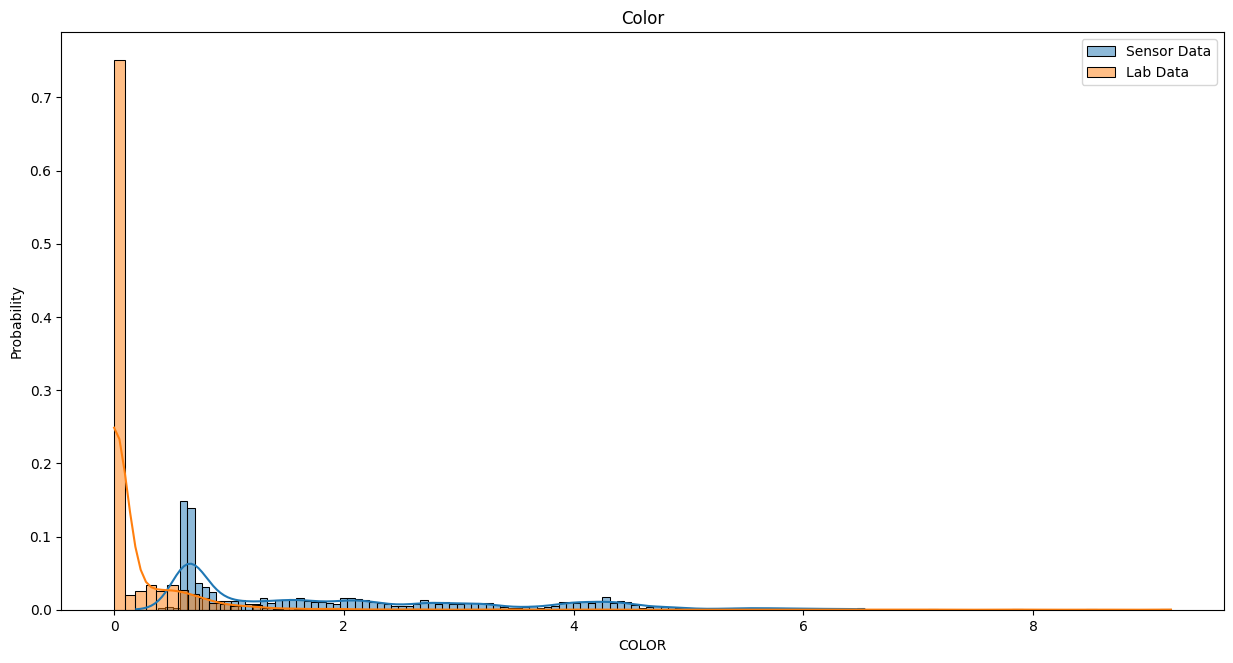

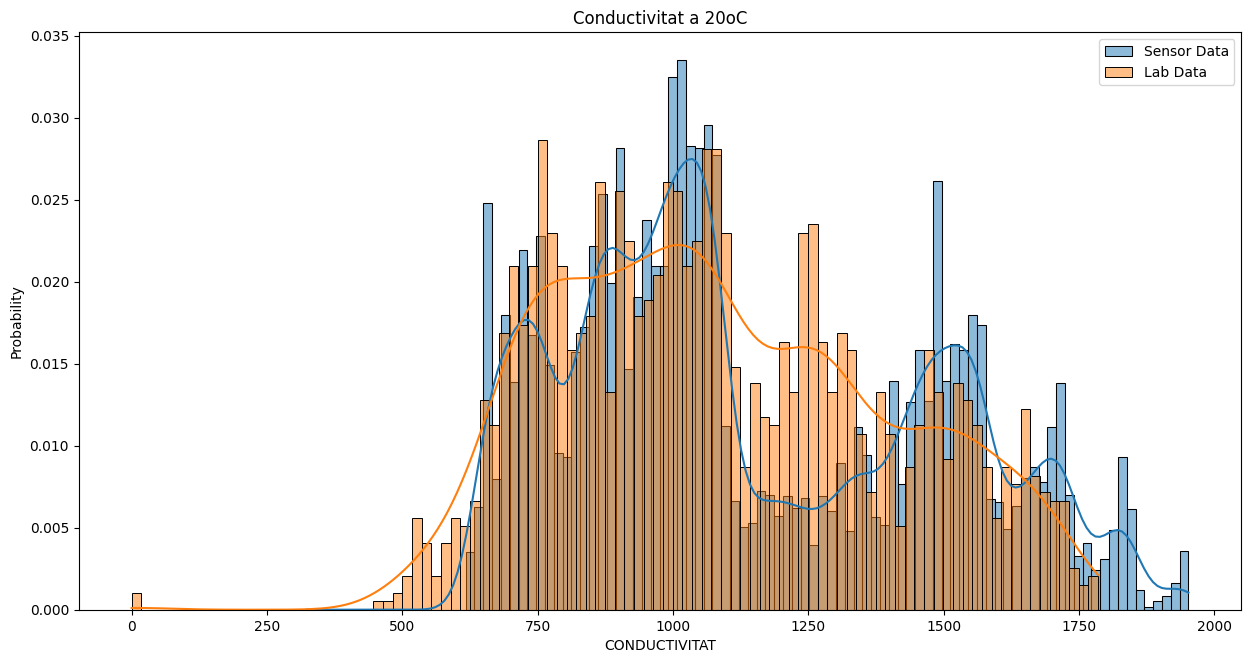

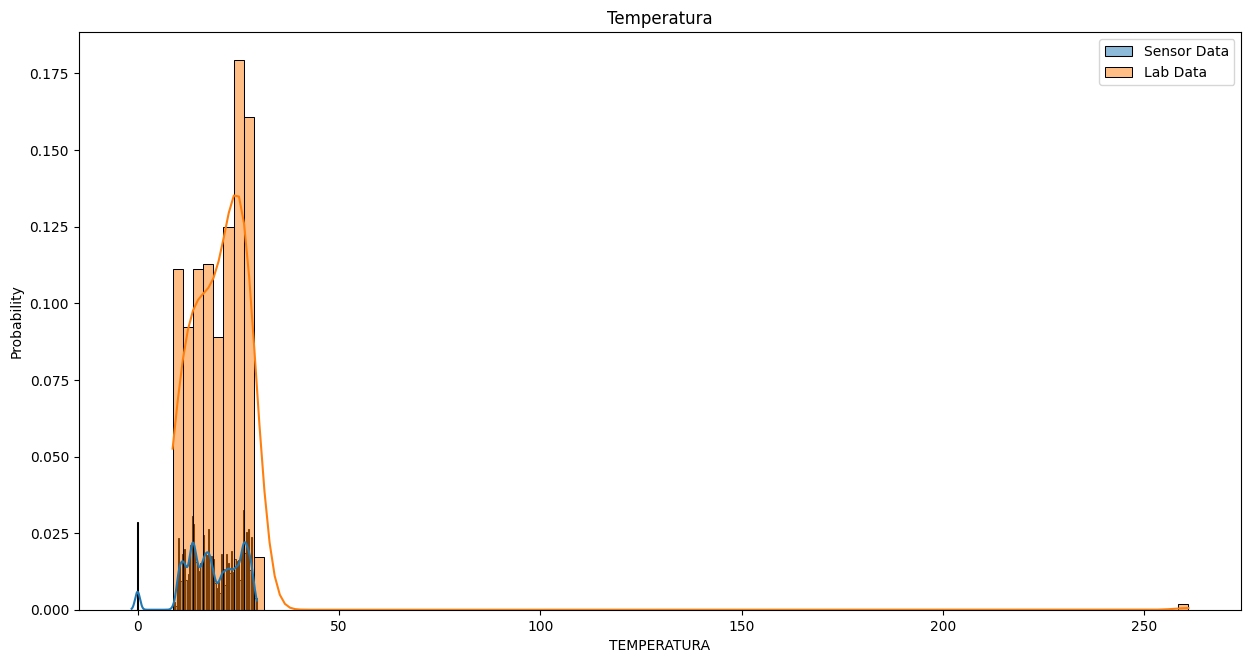

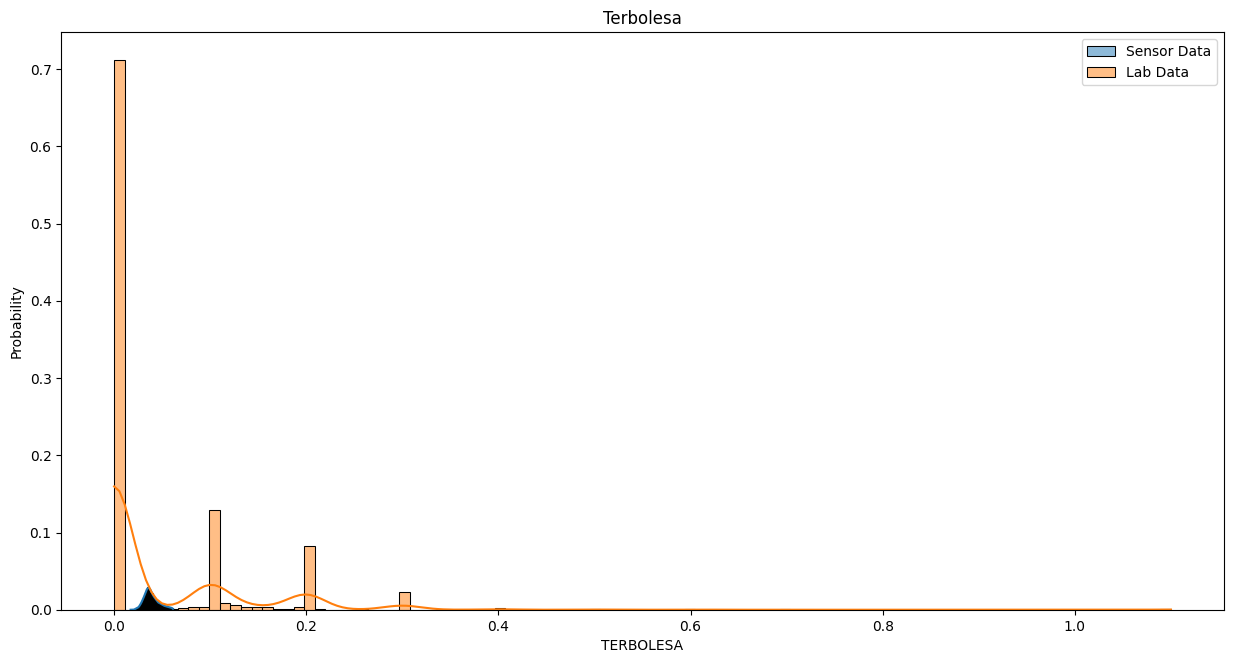

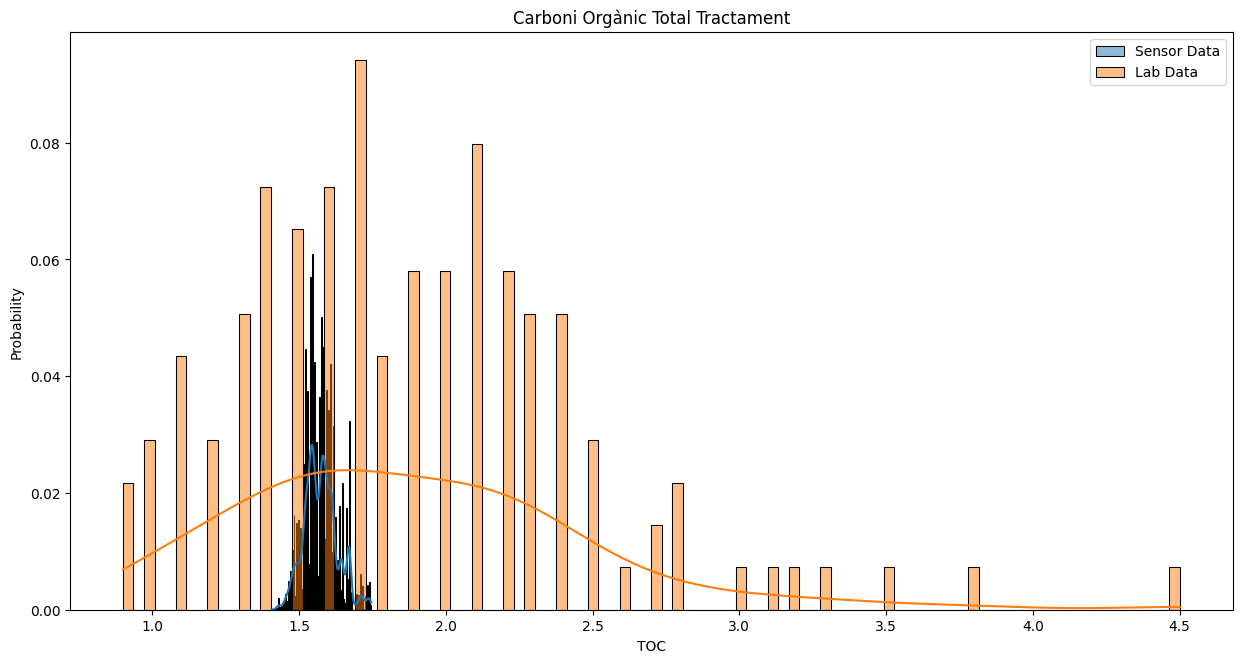

In [26]:
for lab_key, sensor_key in eb1_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb1_features_lab_df[lab_key]
    sensor_df = eb1_sensor_df[sensor_key]
    
    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:

        plt.figure(figsize=(15, 7.5))

        # counts, bins, patches = plt.hist(
        #     lab_df,
        #     bins=100,
        #     color="blue",
        #     alpha=0.5,
        #     label="Lab",
        #     density=True,
        # )
        # # # Add counts as annotations
        # # for count, bin in zip(counts, bins):
        # #     plt.text(bin, count, str(int(count)))

        # plt.hist(
        #     sensor_df,
        #     bins=100,
        #     color="red",
        #     alpha=0.5,
        #     label="Sensor",
        #     density=True,
        # )
        
        sns.histplot(
            data=sensor_df,
            kde=True,
            bins=100,
            alpha=0.5,
            stat='probability',
            label='Sensor Data'
        )
        
        sns.histplot(
            data=lab_df,
            kde=True,
            bins=100,
            stat='probability',
            label='Lab Data'
        )
        
        plt.title(lab_key)
        plt.legend()
        plt.show()
        
        # The y-axis of a histplot with stat="probability" corresponds
        # to the probability that a value belongs to a certain bar.
        # The sum of the bar heights must be 1.

### Boxplots

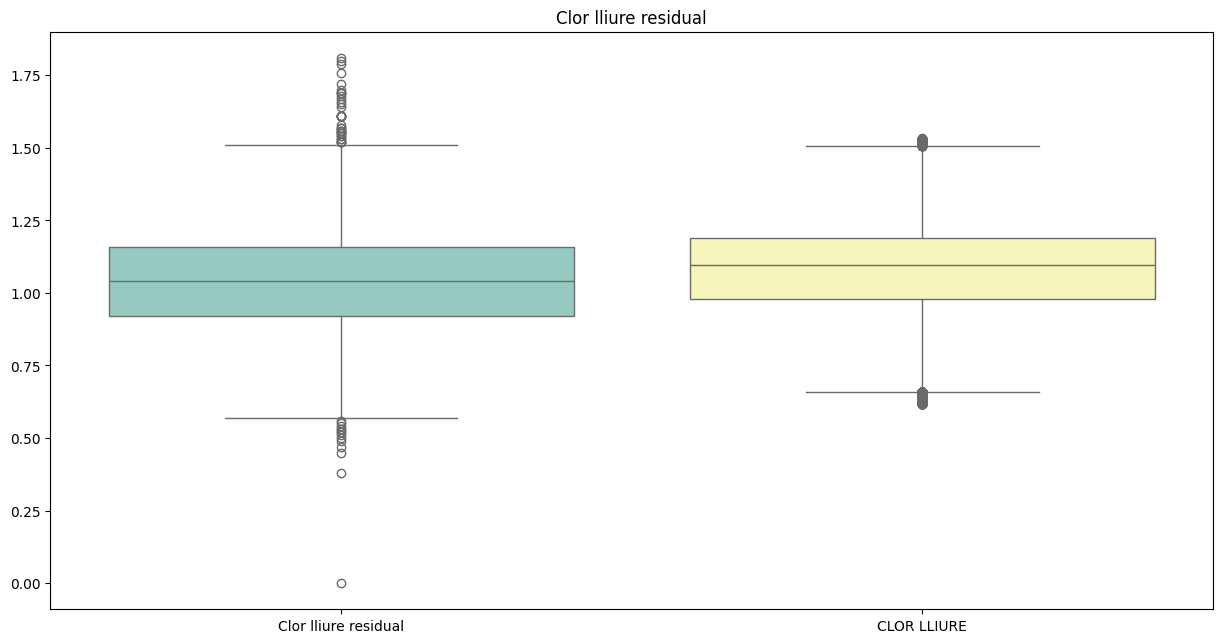

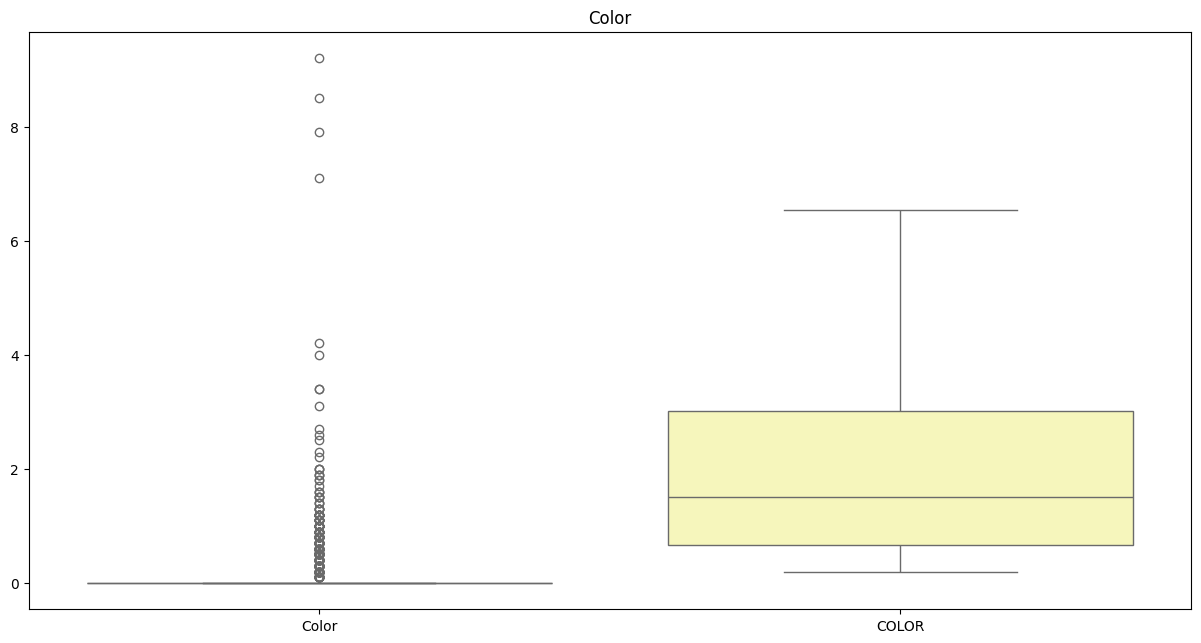

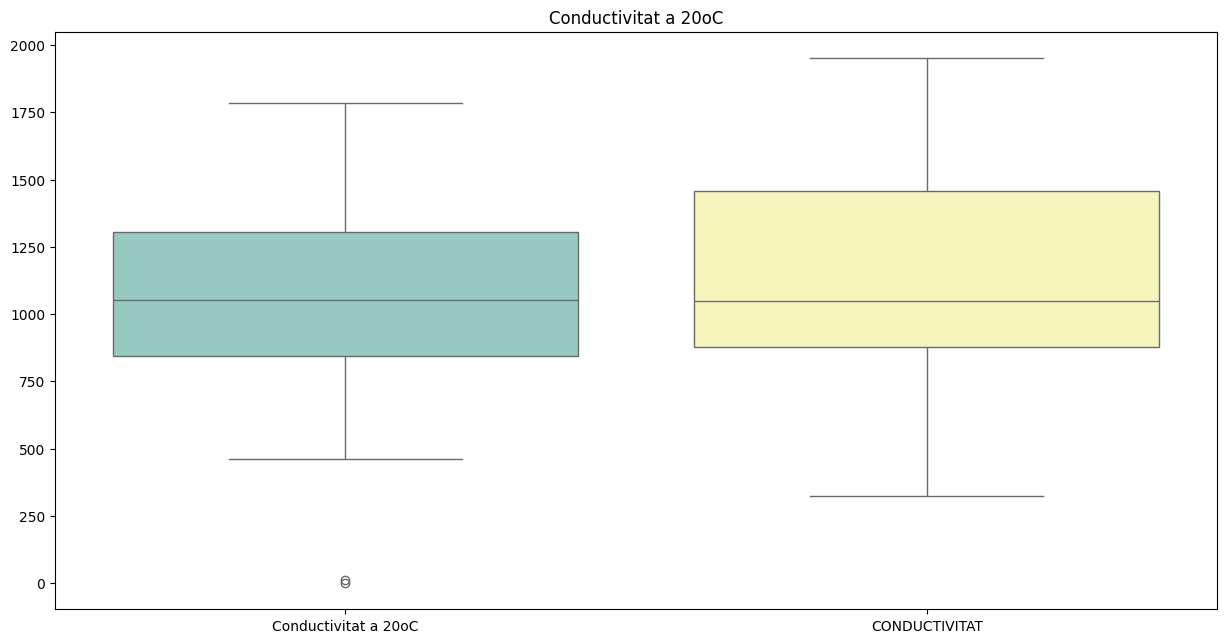

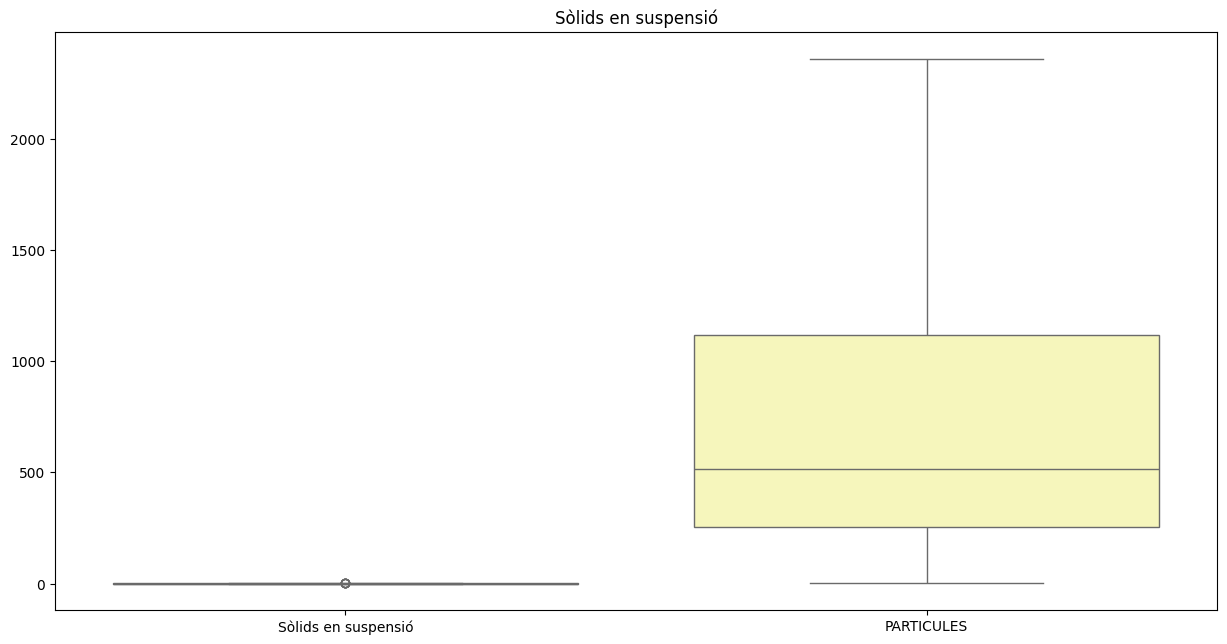

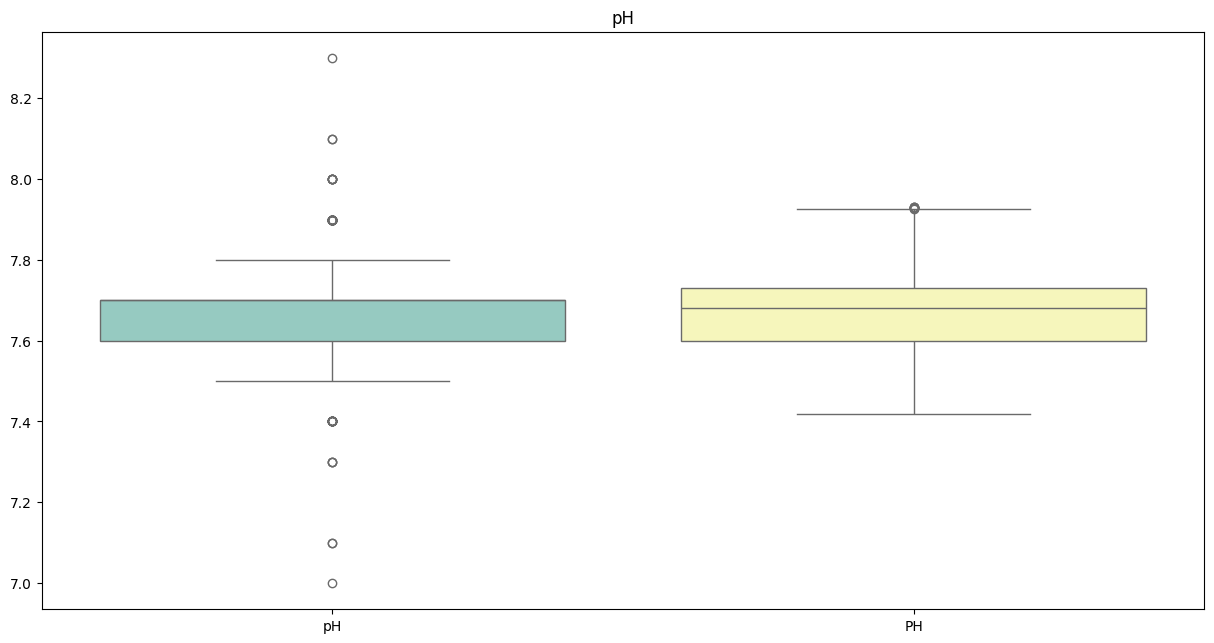

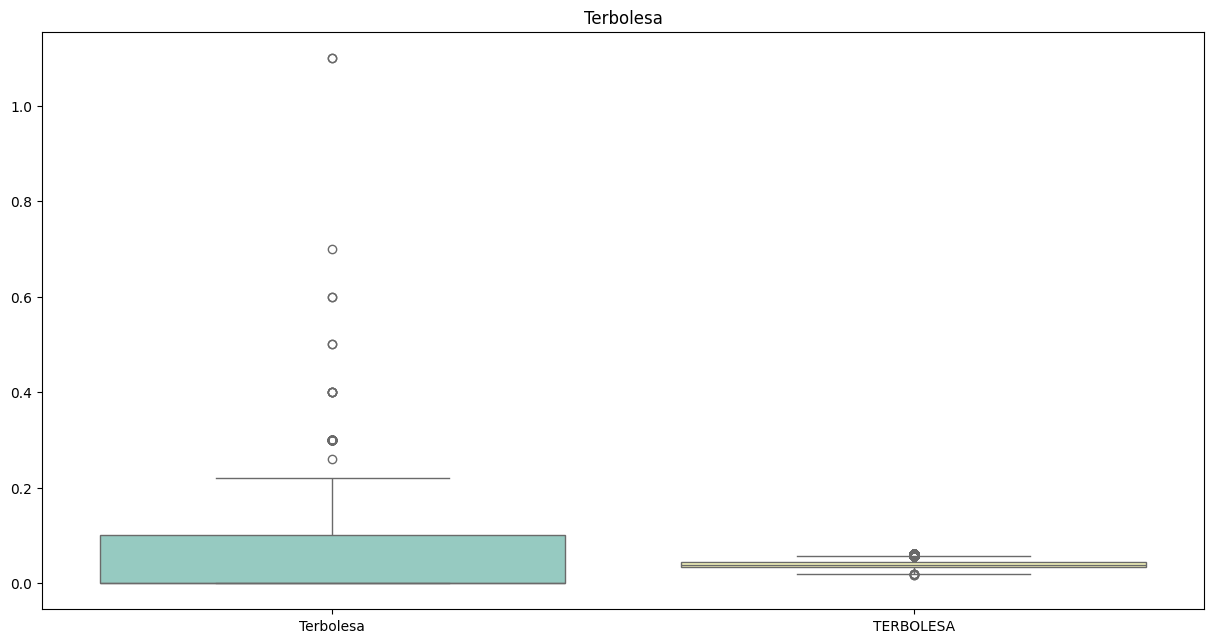

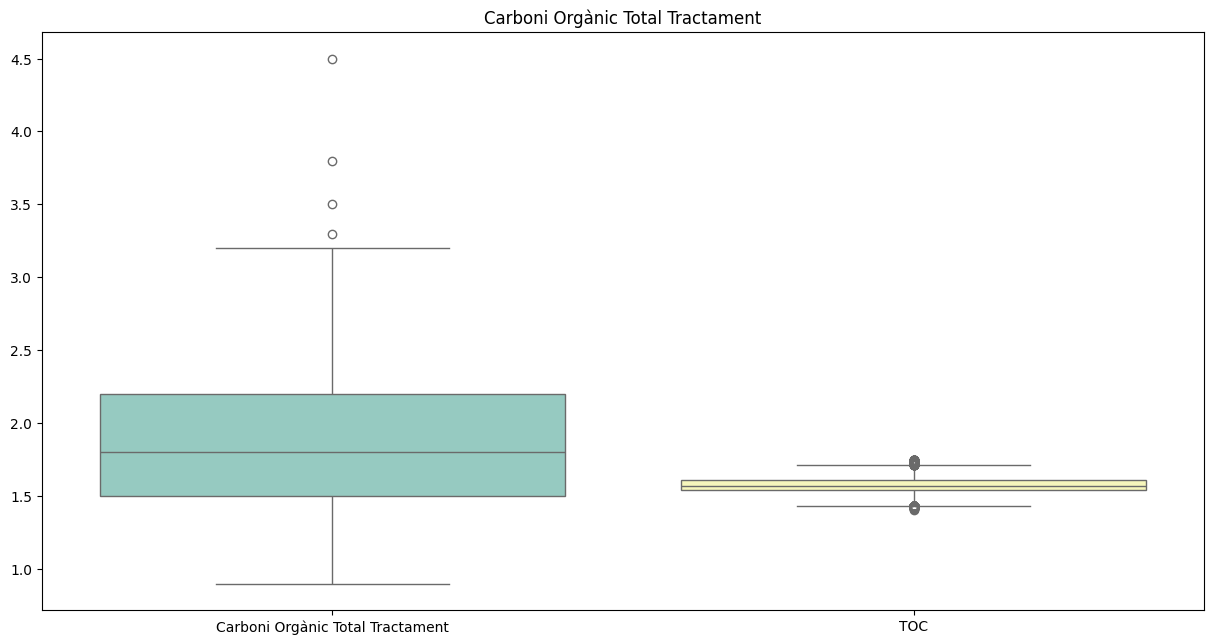

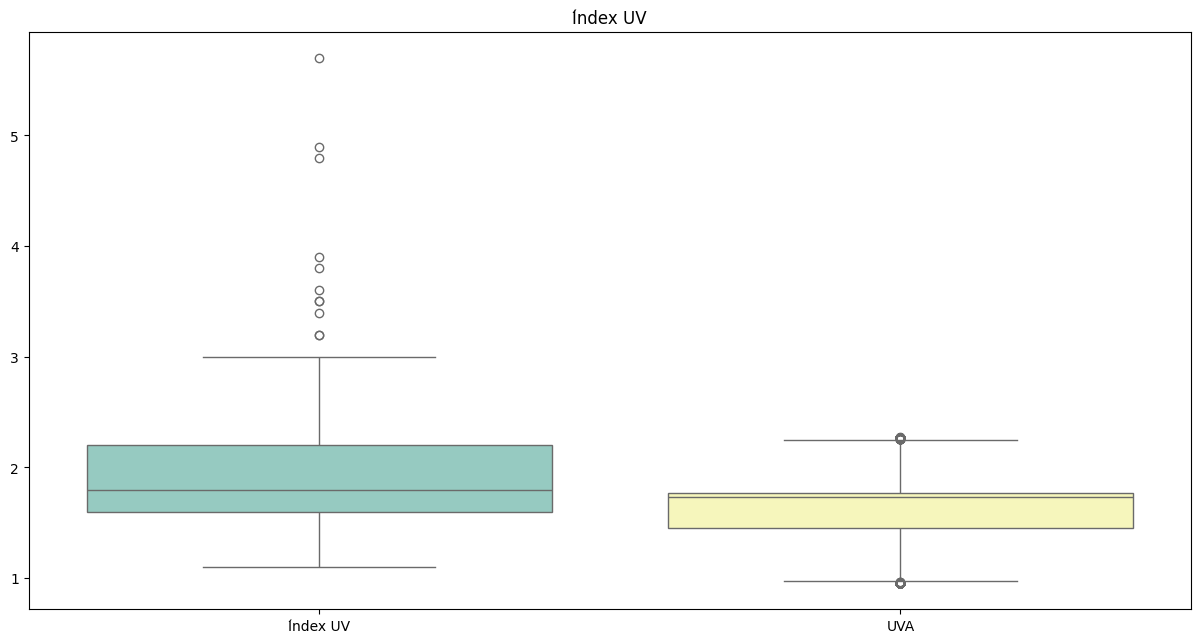

In [27]:
for lab_key, sensor_key in eb1_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb1_features_lab_df[lab_key]
    sensor_df = eb1_sensor_df[sensor_key]
    
    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:

        plt.figure(figsize=(15, 7.5))
        
        sns.boxplot(
            data=[lab_df, sensor_df],
            palette="Set3"
        )
        
        plt.title(lab_key)
        plt.show()

### Time series

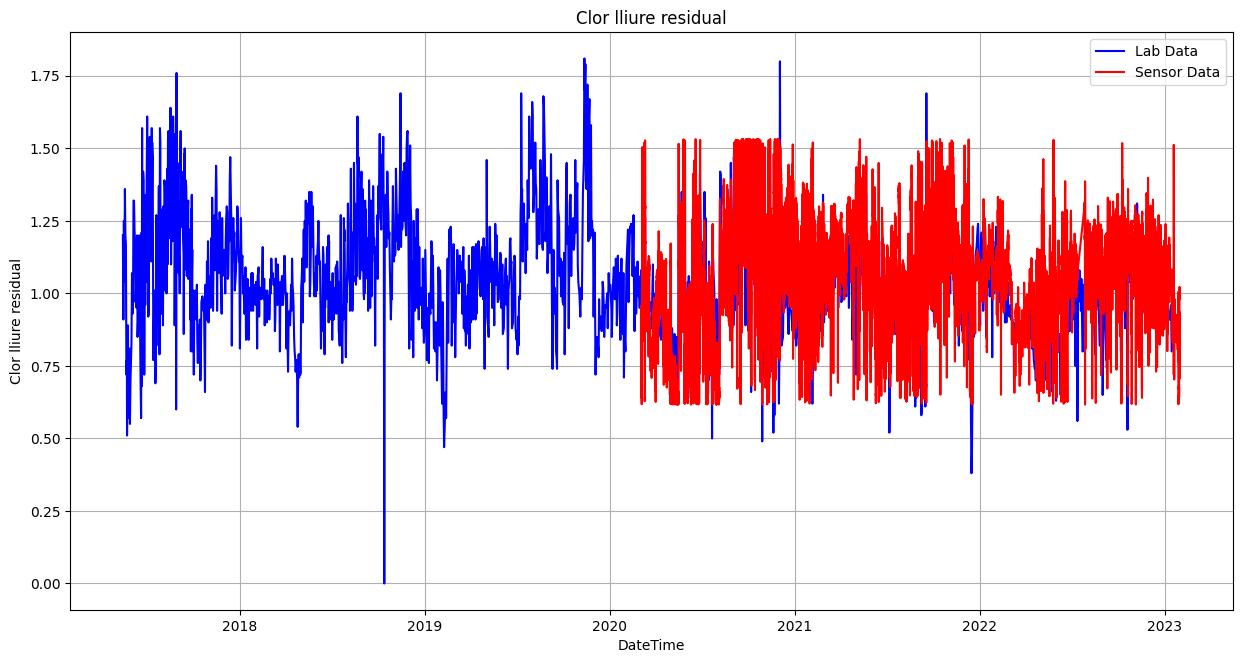

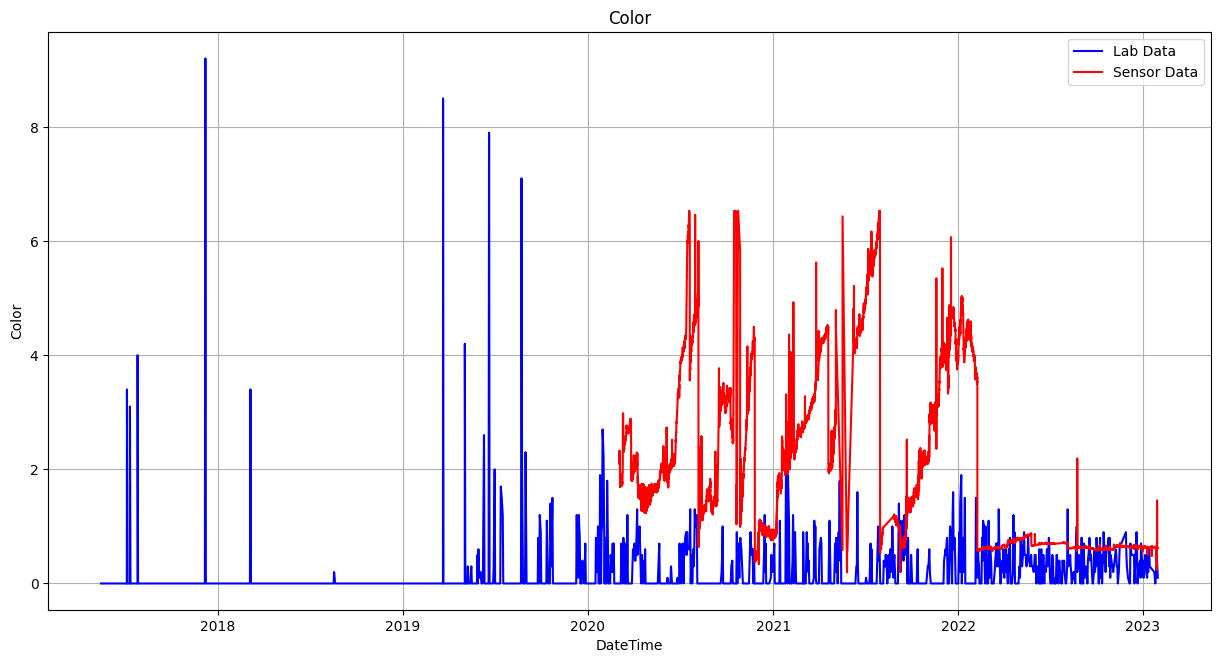

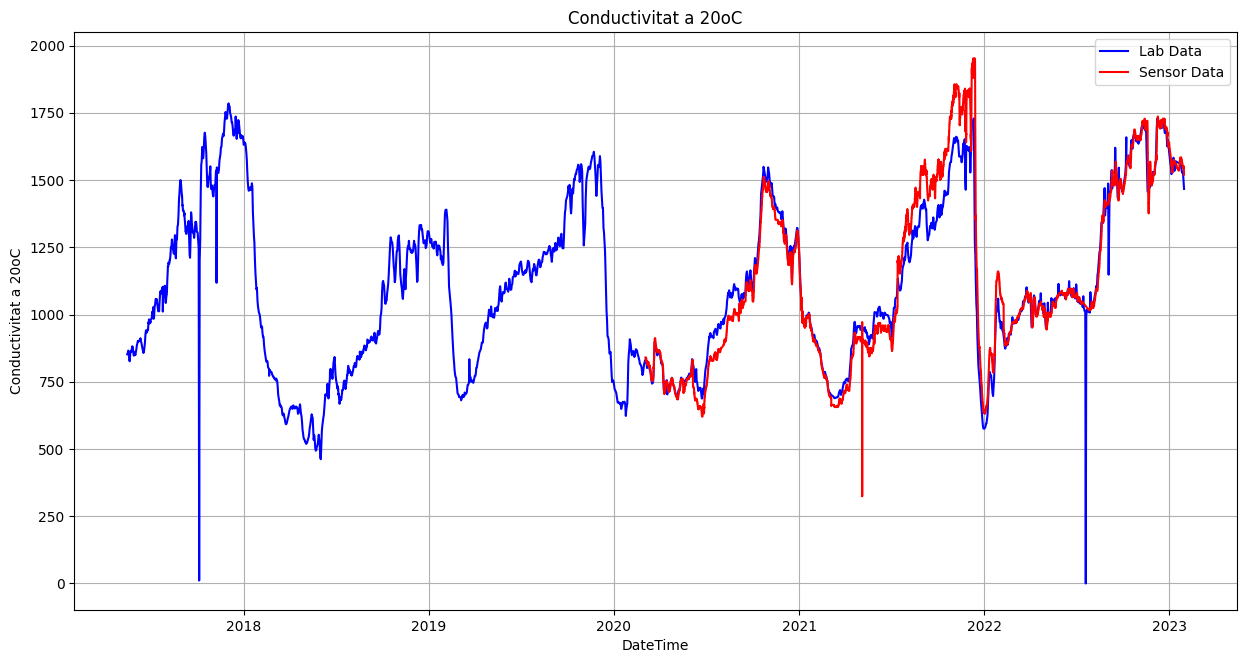

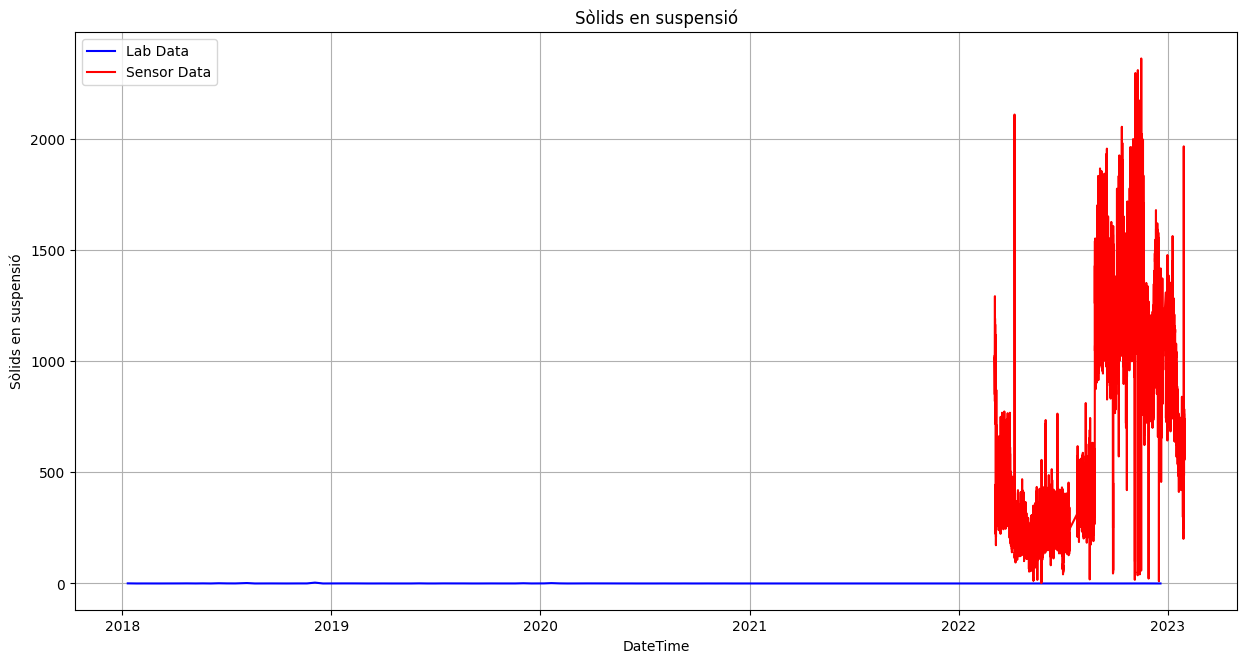

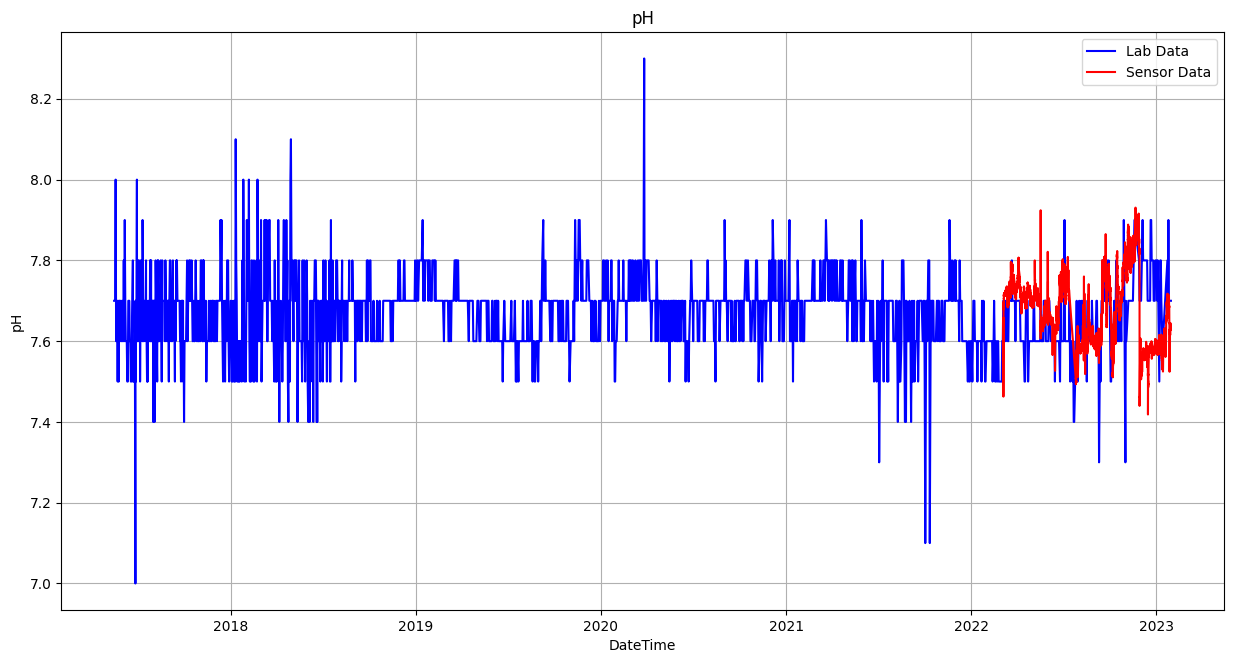

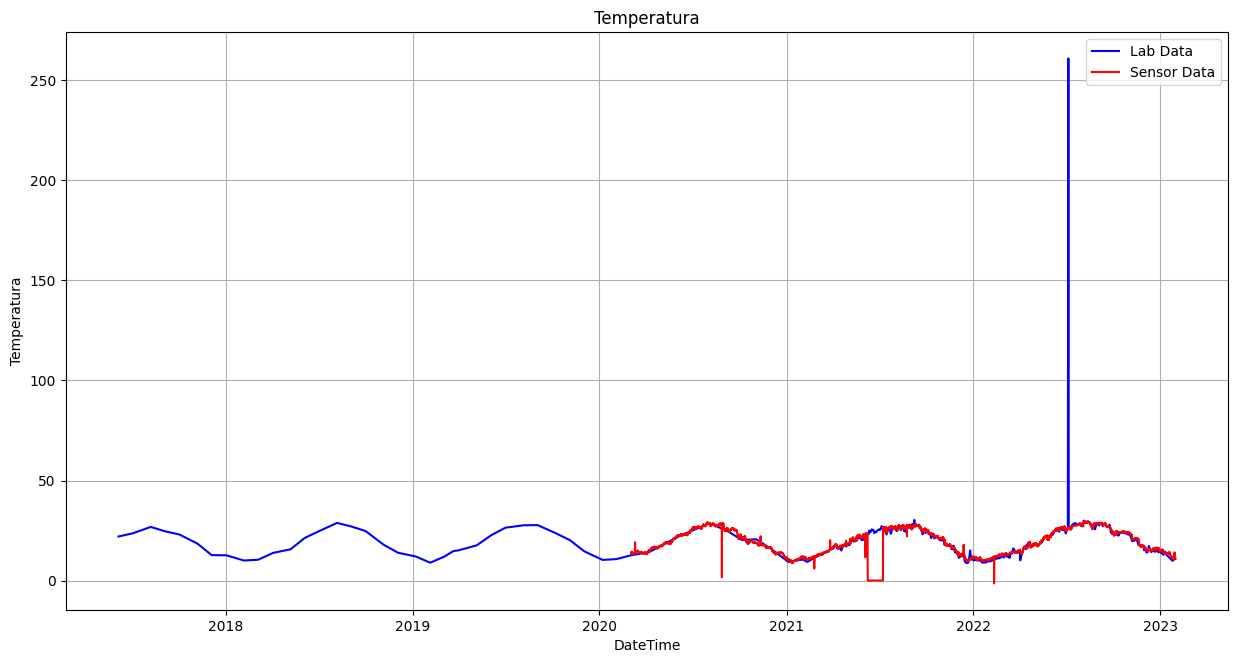

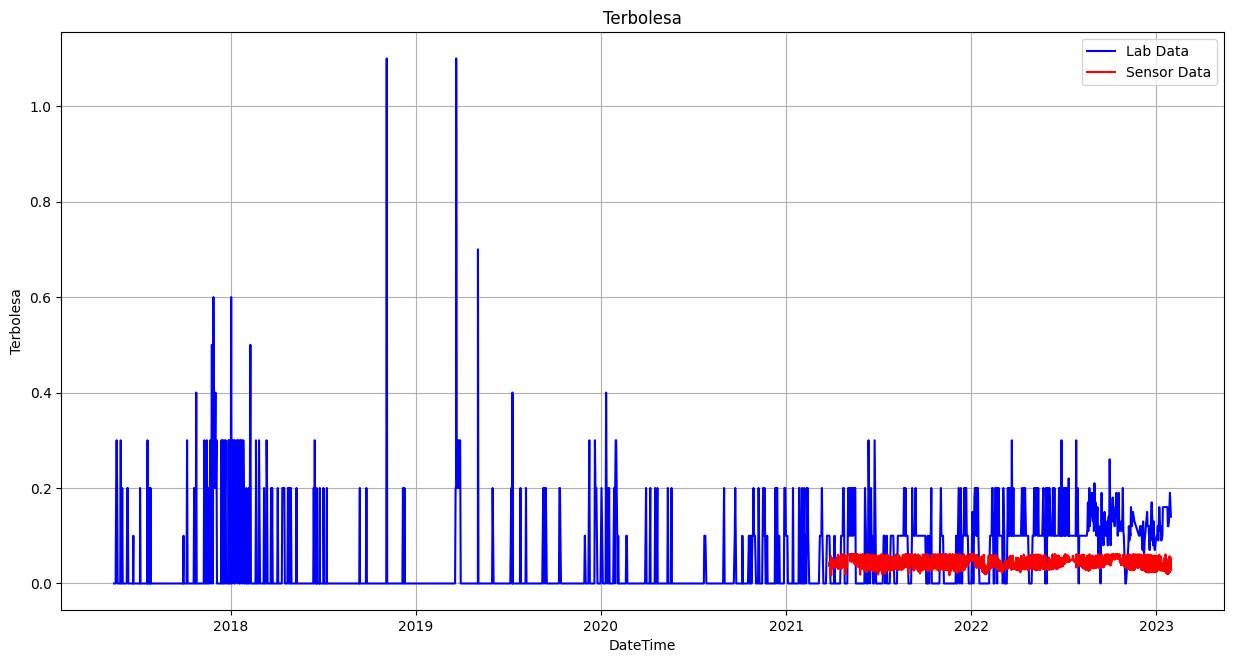

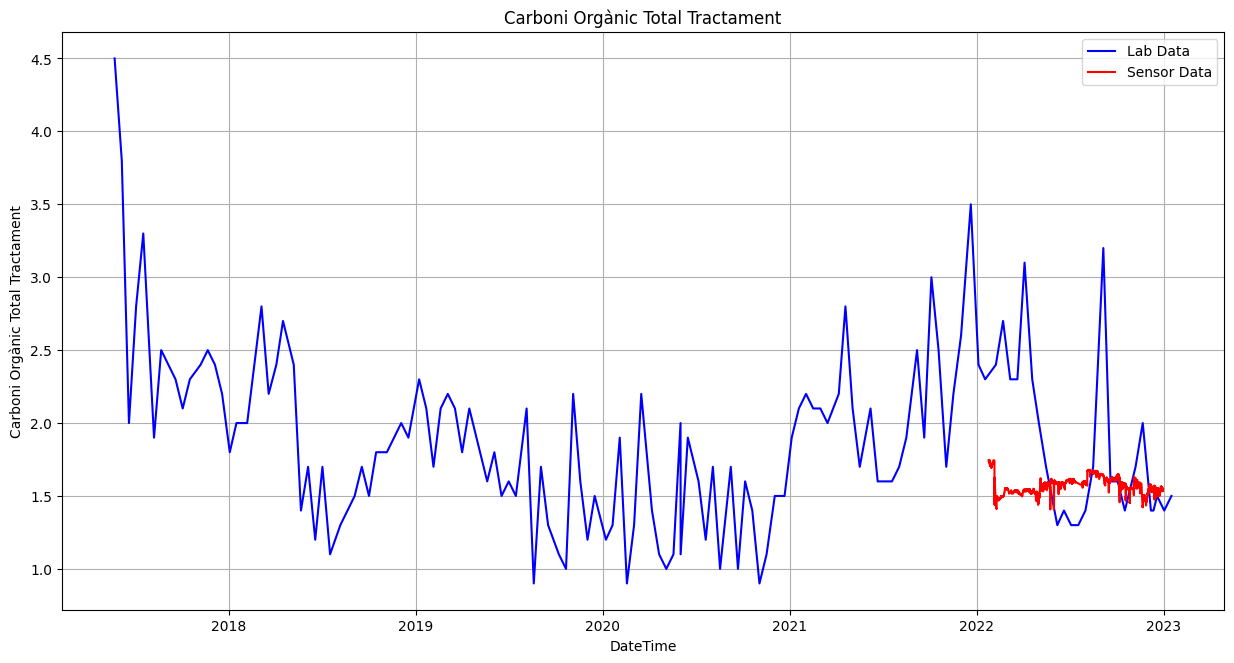

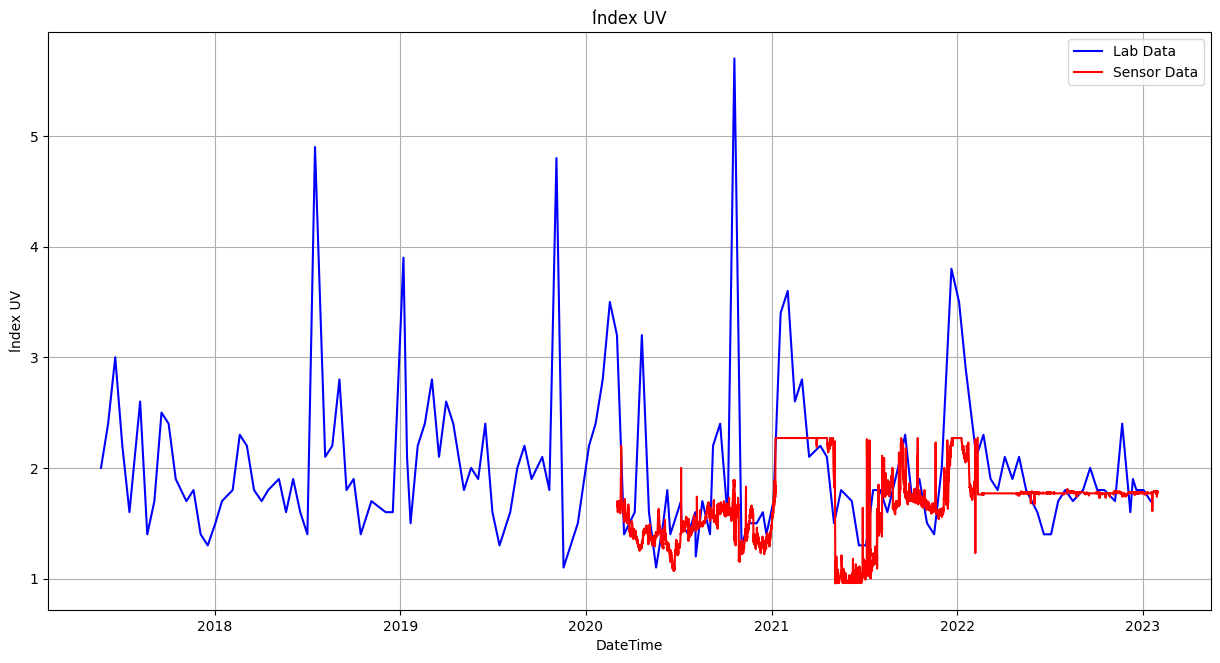

In [28]:
for lab_key, sensor_key in eb1_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb1_features_lab_df[['DateTime', lab_key]]
    sensor_df = eb1_sensor_df[['DateTime', sensor_key]]
    
    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df[sensor_key] != 0]

    if not lab_df.empty and not sensor_df.empty:

        plt.figure(figsize=(15, 7.5))
        
        sns.lineplot(
            x='DateTime',
            y=lab_key,
            data=lab_df,
            color='blue',
            label='Lab Data',
        )
        
        sns.lineplot(
            x='DateTime',
            y=sensor_key,
            data=sensor_df,
            color='red',
            label='Sensor Data'
        )
        
        plt.title(lab_key)
        plt.legend()
        plt.grid(True)
        plt.show()

### Retrieve Common Time Range data + Hypothesis Tests

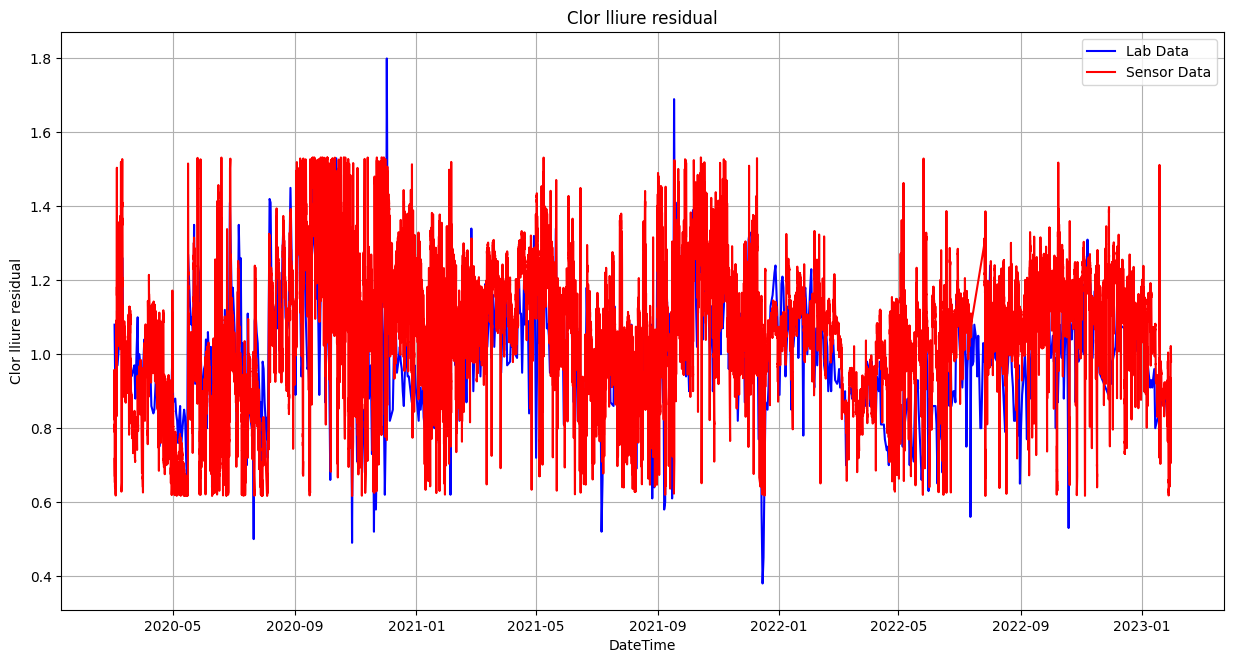

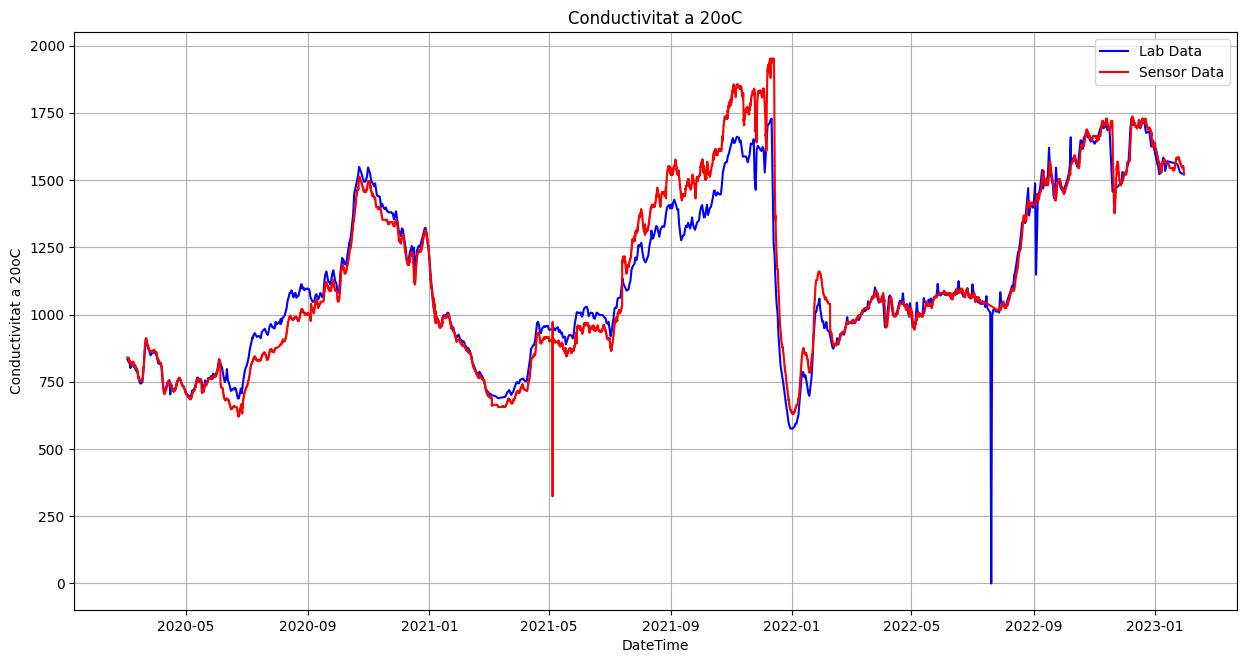

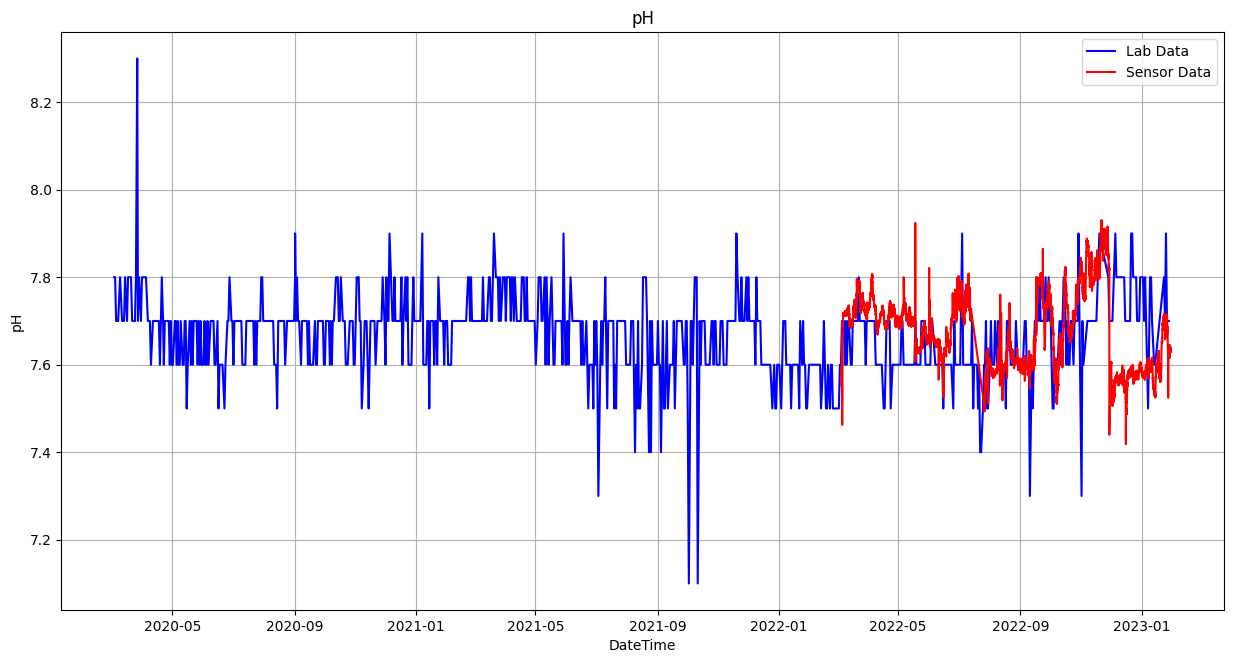

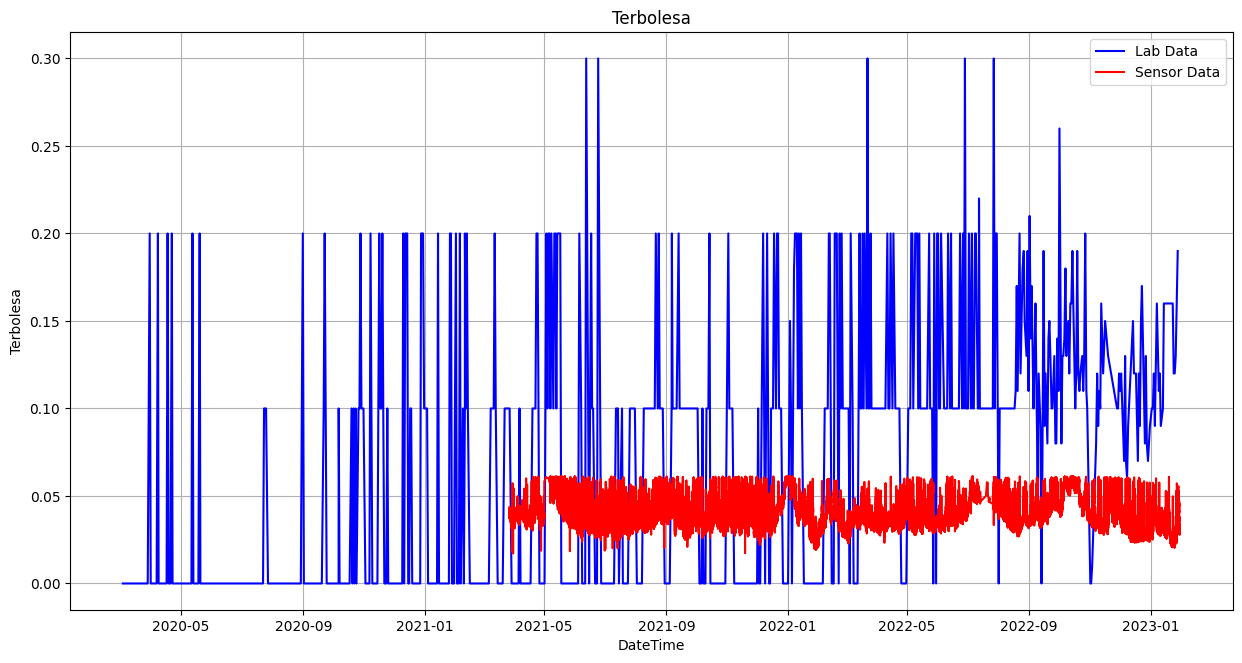

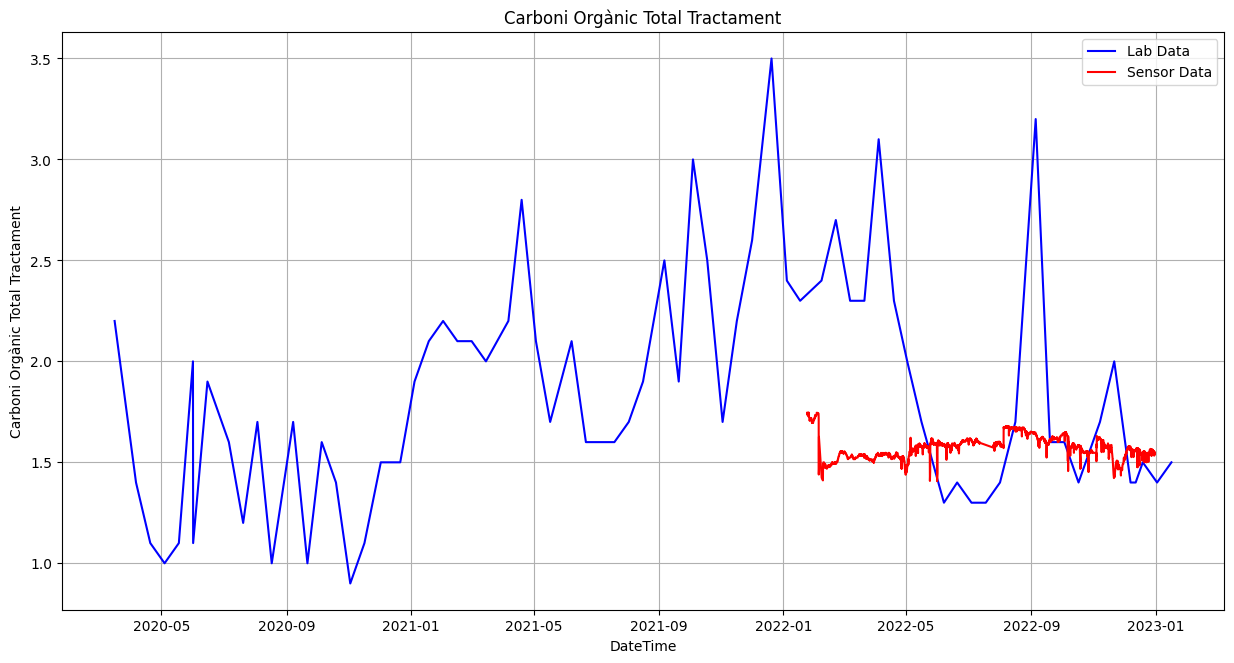

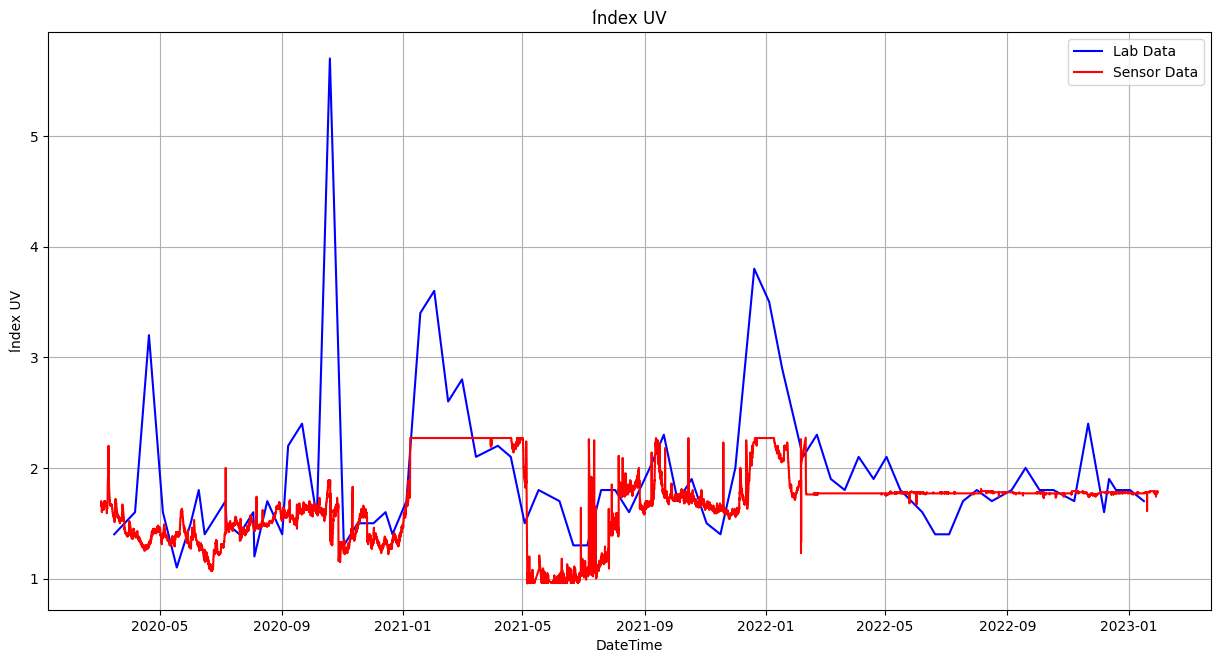

In [29]:
ks_hypothesis_tests = {}
t_hypothesis_tests = {}
u_hypothesis_tests = {}

# get common time range samples for lab and sensor data
for lab_key, sensor_key in eb1_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb1_features_lab_df[['DateTime', lab_key]]
    sensor_df = eb1_sensor_df[['DateTime', sensor_key]]
    
    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:
        
        lab_time_range_df = lab_df[
            (
                lab_df["DateTime"]
                >= sensor_df["DateTime"].min()
            )
            & (
                lab_df["DateTime"]
                <= sensor_df["DateTime"].max()
            )
        ]
        
        sensor_time_range_df = sensor_df[
            (
                sensor_df["DateTime"]
                >= lab_df["DateTime"].min()
            )
            & (
                sensor_df["DateTime"]
                <= lab_df["DateTime"].max()
            )
        ]
        
        plt.figure(figsize=(15, 7.5))
        
        sns.lineplot(
            x='DateTime',
            y=lab_key,
            data=lab_time_range_df,
            color='blue',
            label='Lab Data',
        )
        
        sns.lineplot(
            x='DateTime',
            y=sensor_key,
            data=sensor_time_range_df,
            color='red',
            label='Sensor Data'
        )
        
        # two sample KS test
        ks_result, ks_p_value = stats.ks_2samp(lab_df[lab_key], sensor_df[sensor_key])
        t_result, t_p_value = stats.ttest_ind(lab_df[lab_key].dropna(), sensor_df[sensor_key].dropna())
        u_result, u_p_value = stats.mannwhitneyu(lab_df[lab_key].dropna(), sensor_df[sensor_key].dropna())
        
        ks_hypothesis_tests[lab_key] = {
            'ks_test': ks_result,
            'p_value': ks_p_value
        }
        
        t_hypothesis_tests[lab_key] = {
            't_test': t_result,
            'p_value': t_p_value
        }
        
        u_hypothesis_tests[lab_key] = {
            'u_test': u_result,
            'p_value': u_p_value
        }
        
        plt.title(lab_key)
        plt.grid(True)
        plt.legend()
        plt.show()

In [30]:
pd.DataFrame(ks_hypothesis_tests).T

ks_test        p_value
Clor lliure residual               0.150333   7.486107e-41
Color                              0.830691   0.000000e+00
Conductivitat a 20oC               0.074115   3.177099e-10
Sòlids en suspensió              0.243272  3.864537e-107
pH                                 0.648865   0.000000e+00
Temperatura                        0.702131   0.000000e+00
Terbolesa                          0.674217   0.000000e+00
Carboni Orgànic Total Tractament  0.268194  1.663846e-130
Índex UV                          0.785773   0.000000e+00

In [31]:
pd.DataFrame(t_hypothesis_tests).T

t_test        p_value
Clor lliure residual               -7.839864   4.540200e-15
Color                             -54.128740   0.000000e+00
Conductivitat a 20oC               -7.241684   4.452269e-13
Sòlids en suspensió             -14.119137   3.627721e-45
pH                                 -3.630387   2.832939e-04
Temperatura                         5.926284   3.105363e-09
Terbolesa                          21.413223  1.804446e-101
Carboni Orgànic Total Tractament  54.655679   0.000000e+00
Índex UV                          18.483671   3.509435e-76

In [32]:
pd.DataFrame(u_hypothesis_tests).T

u_test        p_value
Clor lliure residual               124278566.5   7.719581e-24
Color                               10378080.0   0.000000e+00
Conductivitat a 20oC               136275331.0   1.703670e-08
Sòlids en suspensió                      5.0   8.332134e-64
pH                                  43087066.0   1.548464e-02
Temperatura                         47965254.5   1.552765e-04
Terbolesa                           49774318.0  5.040580e-228
Carboni Orgànic Total Tractament    4244490.5   5.480150e-12
Índex UV                           12815531.0   8.994177e-16

### Distributions Divergence

In [33]:
kl_divs = {}
js_divs = {}
tv_dists = {}
w_dists = {}

for lab_key, sensor_key in eb1_features_mapping.items():
    # Compute the probability distribution of the feature in each DataFrame
    lab_df = eb1_features_lab_df[lab_key]
    sensor_df = eb1_sensor_df[sensor_key]

    lab_pdist = np.histogram(
        lab_df.dropna(), bins=100, density=True
    )[0]
    sensor_pdist = np.histogram(
        sensor_df.dropna(), bins=100, density=True
    )[0]

    # Add a small constant to avoid division by zero
    lab_pdist = lab_pdist + np.finfo(np.float64).eps
    sensor_pdist = sensor_pdist + np.finfo(np.float64).eps

    # Compute divergence metrics
    kl_div = stats.entropy(lab_pdist, sensor_pdist)
    js_div = jensenshannon(lab_pdist, sensor_pdist)
    tv_dist = np.sum(np.abs(lab_pdist - sensor_pdist)) / 2
    w_dist = wasserstein_distance(lab_pdist, sensor_pdist)

    kl_divs[lab_key] = kl_div
    js_divs[lab_key] = js_div
    tv_dists[lab_key] = tv_dist
    w_dists[lab_key] = w_dist


kl_divs = pd.Series(kl_divs)
js_divs = pd.Series(js_divs)
tv_dists = pd.Series(tv_dists)
w_dists = pd.Series(w_dists)

In [34]:
kl_divs

Clor lliure residual                  0.266746
Color                                 3.580301
Conductivitat a 20oC                  0.616845
Sòlids en suspensió                 2.093993
pH                                    2.667730
Temperatura                          29.203962
Terbolesa                             8.458231
Carboni Orgànic Total Tractament     2.426602
Índex UV                             2.567244
dtype: float64

In [35]:
js_divs

Clor lliure residual                 0.280910
Color                                0.714178
Conductivitat a 20oC                 0.250615
Sòlids en suspensió                0.663850
pH                                   0.735926
Temperatura                          0.805118
Terbolesa                            0.804647
Carboni Orgànic Total Tractament    0.668264
Índex UV                            0.704109
dtype: float64

In [36]:
tv_dists

Clor lliure residual                   27.412640
Color                                  11.640606
Conductivitat a 20oC                    0.014774
Sòlids en suspensió                  13.168722
pH                                    118.899049
Temperatura                             1.769863
Terbolesa                            1165.116756
Carboni Orgànic Total Tractament     142.292486
Índex UV                              41.373815
dtype: float64

In [37]:
w_dists

Clor lliure residual                  0.539217
Color                                 0.143234
Conductivitat a 20oC                  0.000087
Sòlids en suspensió                 0.263203
pH                                    2.187793
Temperatura                           0.028189
Terbolesa                            21.776934
Carboni Orgànic Total Tractament     2.669264
Índex UV                             0.541201
dtype: float64

# Lab Data Feature-Target Analysis

In [38]:
trihalometh_columns = [
    'Cloroform',
    'Bromodiclorometà',
    'Dibromoclorometà',
    'Bromoform',
]

acid_columns = [
    'àcid bromocloroacètic',
    'àcid dibromoacètic',
    'àcid dicloroacètic',
    'àcid monobromoacètic',
    'àcid monocloroacètic'
]       

other_columns = [
    'Clorat',
    'Clorit',
]

trihalometh_mapping = {
    'Cloroform': 'TCM',
    'Bromodiclorometà': 'DCBM',
    'Dibromoclorometà': 'CDBM',
    'Bromoform': 'TBM',
}

## EB1 - THMs

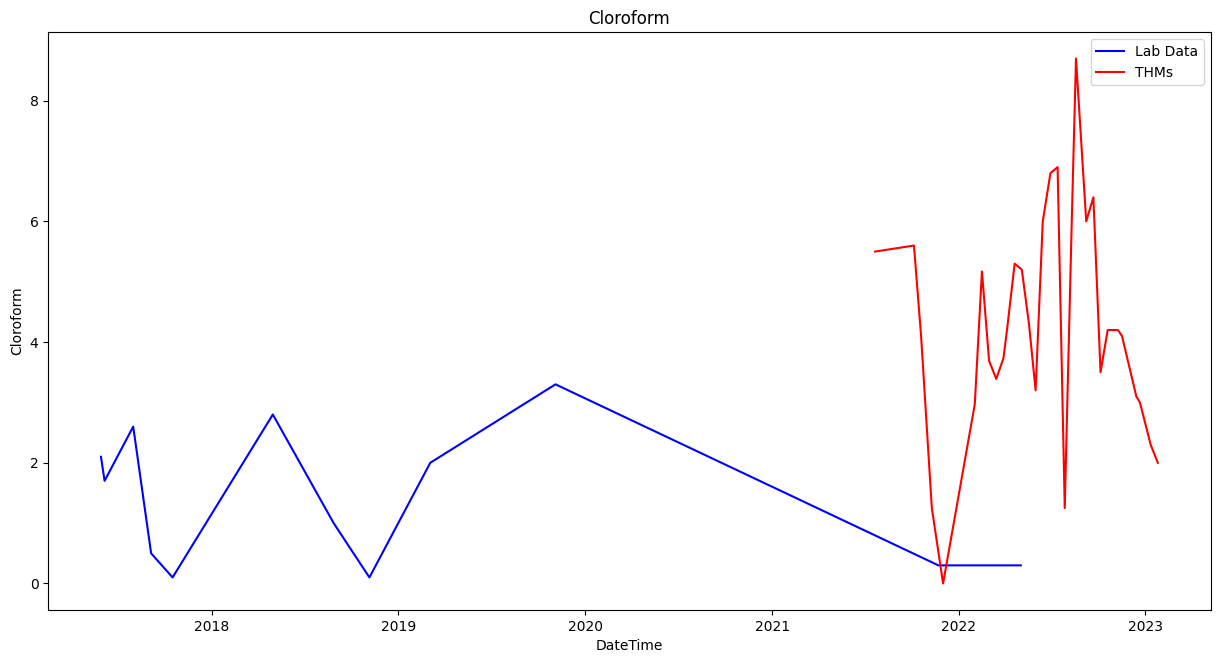

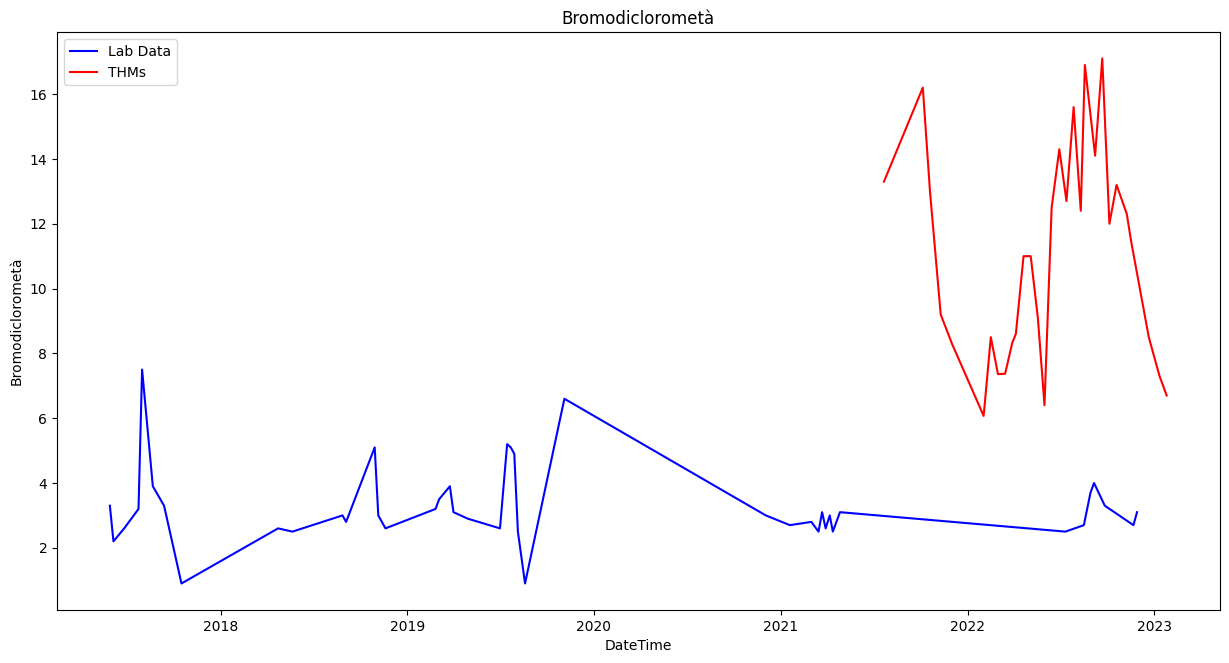

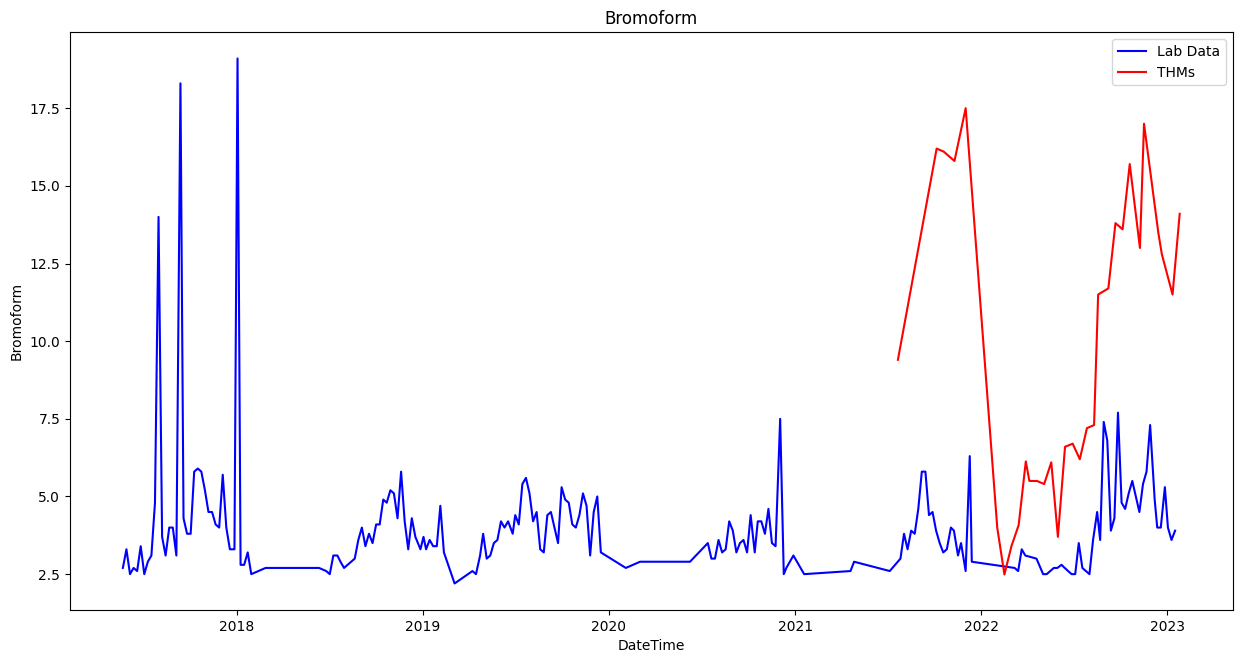

In [39]:
for eb1_key, thm_key in trihalometh_mapping.items():
    plt.figure(figsize=(15, 7.5))
    
    lab_df = eb1_targets_lab_df[['DateTime', eb1_key]]
    lab_df = lab_df[lab_df != 0]
    
    thms = thms_df[['DateTime', thm_key]]
    
    sns.lineplot(
        x='DateTime',
        y=eb1_key,
        data=lab_df,
        color='blue',
        label='Lab Data'
    )
    
    sns.lineplot(
        x='DateTime',
        y=thm_key,
        data=thms,
        color='red',
        label='THMs'
    )
    
    plt.title(eb1_key)
    plt.show()

### Join on same day

In [ ]:
eb1_targets_lab_df

In [ ]:
eb1_features_lab_df

In [52]:
eb1_features_lab_df['Date'] = eb1_features_lab_df['DateTime'].dt.date
eb1_targets_lab_df['Date'] = eb1_targets_lab_df['DateTime'].dt.date

eb1_lab_df = pd.merge(
    eb1_features_lab_df,
    eb1_targets_lab_df,
    on='Date',
    how='inner'
)

eb1_features_lab_df.drop(columns=['Date'], inplace=True)
eb1_targets_lab_df.drop(columns=['Date'], inplace=True)

In [54]:
eb1_lab_df

DateTime_x  Carboni Orgànic Total Tractament  \
0   2017-05-15 07:40:00                                NaN   
1   2017-05-22 07:15:00                                4.5   
2   2017-05-29 07:00:00                                NaN   
3   2017-06-05 07:30:00                                3.8   
4   2017-06-12 07:40:00                                NaN   
..                  ...                                ...   
433 2022-12-19 08:00:00                                NaN   
434 2022-12-27 07:00:00                                NaN   
435 2023-01-02 06:55:00                                1.4   
436 2023-01-09 08:30:00                                NaN   
437 2023-01-16 08:35:00                                1.5   

     Clor lliure residual  Color  Conductivitat a 20oC  Sòlids en suspensió  \
0                    1.20    0.0                 852.0                    NaN   
1                    0.72    0.0                 864.0                    NaN   
2                    0.55    0.0                 860.0                    NaN   
3                    1.32    0.0                 902.0                    NaN   
4                    1.20    0.0                 894.0                    NaN   
..                    ...    ...                   ...                    ...   
433                   NaN    NaN                   NaN                   0.02   
434                  1.06    0.1                1655.0                    NaN   
435                  1.06    0.1                1580.0                    NaN   
436                  0.91    0.1                1583.0                    NaN   
437                   NaN    NaN                   NaN                    NaN   

     Temperatura  Terbolesa   pH  Índex UV  ... Bromoform Clorat  Clorit  \
0            NaN       0.00  7.7        NaN  ...       0.0    NaN     NaN   
1            NaN       0.00  7.5        2.0  ...       2.7    0.0     0.0   
2            NaN       0.00  7.7        NaN  ...       3.3    NaN     NaN   
3           22.0       0.00  7.9        2.4  ...       2.5    NaN     0.0   
4            NaN       0.00  7.7        NaN  ...       2.7    NaN     NaN   
..           ...        ...  ...        ...  ...       ...    ...     ...   
433          NaN        NaN  NaN        NaN  ...       4.0  127.0     0.0   
434         14.5       0.13  7.7        NaN  ...       5.3    NaN     NaN   
435         13.7       0.10  7.8        1.8  ...       4.0  136.0     0.0   
436         14.3       0.11  7.8        NaN  ...       3.6    NaN     NaN   
437          NaN        NaN  NaN        1.7  ...       3.9  132.0     0.0   

     Cloroform  Dibromoclorometà  àcid bromocloroacètic  àcid dibromoacètic  \
0          0.0               0.0                    NaN                 NaN   
1          0.0               4.9                    1.3                 1.7   
2          2.1               7.2                    NaN                 NaN   
3          1.7               5.3                    1.3                 1.7   
4          0.0               3.8                    NaN                 NaN   
..         ...               ...                    ...                 ...   
433        0.0               4.1                    0.8                 2.2   
434        0.0               5.4                    NaN                 NaN   
435        0.0               4.3                    0.9                 2.3   
436        0.0               3.6                    NaN                 NaN   
437        0.0               3.6                    0.7                 2.3   

     àcid dicloroacètic  àcid monobromoacètic  àcid monocloroacètic  
0                   NaN                   NaN                   NaN  
1                   0.8                   0.0                   0.0  
2                   NaN                   NaN                   NaN  
3                   0.7                   0.0                   0.0  
4                   NaN                   NaN                   NaN  
.

### Join on previous day EB(t-1) -> THMs(t)

In [48]:
eb1_features_lab_df['Date'] = eb1_features_lab_df['DateTime'].dt.date
eb1_targets_lab_df['Date'] = (eb1_targets_lab_df['DateTime'] - pd.Timedelta(days=1)).dt.date

eb1_lab_df = pd.merge(
    eb1_features_lab_df,
    eb1_targets_lab_df,
    on='Date',
    how='inner'
)

eb1_features_lab_df.drop(columns=['Date'], inplace=True)
eb1_targets_lab_df.drop(columns=['Date'], inplace=True)

In [51]:
eb1_lab_df

DateTime_x  Carboni Orgànic Total Tractament  \
0   2017-05-21 07:30:00                                NaN   
1   2017-05-28 09:00:00                                NaN   
2   2017-06-04 08:55:00                                NaN   
3   2017-06-11 08:03:00                                NaN   
4   2017-06-18 08:35:00                                NaN   
..                  ...                                ...   
101 2022-06-19 07:15:00                                NaN   
102 2022-06-26 11:05:00                                NaN   
103 2022-09-13 08:32:00                                NaN   
104 2022-12-06 11:00:00                                NaN   
105 2022-12-26 08:30:00                                NaN   

     Clor lliure residual  Color  Conductivitat a 20oC  Sòlids en suspensió  \
0                    1.17    0.0                 856.0                    NaN   
1                    0.81    0.0                 847.0                    NaN   
2                    0.97    0.0                 893.0                    NaN   
3                    0.95    0.0                 901.0                    NaN   
4                    0.87    0.0                 879.0                    NaN   
..                    ...    ...                   ...                    ...   
101                  0.87    NaN                   NaN                    NaN   
102                  0.90    0.5                1098.0                    NaN   
103                  1.03    0.0                1505.0                    NaN   
104                  1.08    0.0                1625.0                    NaN   
105                  1.01    0.4                1682.0                    NaN   

     Temperatura  Terbolesa   pH  Índex UV  ... Bromoform Clorat  Clorit  \
0            NaN       0.20  7.7        NaN  ...       2.7    0.0     0.0   
1            NaN       0.30  7.6        NaN  ...       3.3    NaN     NaN   
2            NaN       0.00  7.6        NaN  ...       2.5    NaN     0.0   
3            NaN       0.20  7.5        NaN  ...       2.7    NaN     NaN   
4            NaN       0.00  7.5        NaN  ...       2.6    NaN     NaN   
..           ...        ...  ...        ...  ...       ...    ...     ...   
101         26.4       0.10  NaN        NaN  ...       2.6  447.0     0.0   
102         25.1       0.20  7.7        NaN  ...       2.5    NaN     NaN   
103         28.3       0.00  7.5        NaN  ...       NaN  102.0     0.0   
104         14.3       0.13  7.8        NaN  ...       4.9   78.0     0.0   
105         14.9       0.08  7.8        NaN  ...       5.3    NaN     NaN   

     Cloroform  Dibromoclorometà  àcid bromocloroacètic  àcid dibromoacètic  \
0          0.0               4.9                    1.3                 1.7   
1          2.1               7.2                    NaN                 NaN   
2          1.7               5.3                    1.3                 1.7   
3          0.0               3.8                    NaN                 NaN   
4          0.0               3.6                    1.5                 1.5   
..         ...               ...                    ...                 ...   
101        0.0               3.9                    1.3                 2.2   
102        0.0               4.5                    NaN                 NaN   
103        NaN               NaN                    NaN                 NaN   
104        0.0               4.7                    0.9                 2.4   
105        0.0               5.4                    NaN                 NaN   

     àcid dicloroacètic  àcid monobromoacètic  àcid monocloroacètic  
0                   0.8                   0.0                   0.0  
1                   NaN                   NaN                   NaN  
2                   0.7                   0.0                   0.0  
3                   NaN                   NaN                   NaN  
4                   1.0                   0.0                   0.0  
.

## Correlation Matrix Heatmap

## Hypothesis Tests Correlations

## Scatter Plots

## Boxplots